<font color=black size=5 face=雅黑>队名：Three-eyed crow （三眼乌鸦-预知未来）    
队长：陈永保      
单位：上海理工大学  
电话：18818262667    
邮箱：chenyongbao@usst.edu.cn

本设计方案基于Jupyter lab平台，使用Python语言，根据提供的基础数据以及自行调研数据，对烟台市各区市范围内各停车场、充电站的充电桩数据、营收情况及未来发展进行分析。通过分析目前山东省烟台市已有充电桩发展及使用情况，设计模型算法，对莱山区电动桩的未来发展提供规划方案。本方案在考虑已有充电桩的使用频率及充电量的基础上，主要规划了莱山区2021、2025、2030年充电桩的安装数量及安装位置，可为莱山区新能源汽车充电桩安装位置提供参考依据，所用分析方法也可用于我国其它地区充电桩规划。    
本设计方案共包括六个章节，前四个章节主要根据初赛阶段数据进行分析，第一章节内容主要介绍烟台市整体充电桩分布及使用情况；第二章节详细对莱山区充电桩分布及使用情况进行分析；第三章节提供一种方案A，规划了莱山区充电桩2021，2025，2030年建设情况；第四章节提出一种新的方案B，由于所需数据现阶段没有提供，方案B仅提供了一种规划思路，并没有像方案A那样给出具体规划数字。后两章节根据决赛阶段追加数据，结合初赛数据进行更加深入分析，第五章对莱山区各充电站2021年充电订单时长、营收情况等进行了详细分析，第六章节进行了总结。

特别说明：    
1、本报告代码基于Jupyter lab平台，利用Python语言开发，由Notebook ipynb文件生成而来，为了更好的展示内容，同时提供了html和ipynb文件格式，html文件可方便查看/缩放文件中的图片，ipynb文件可查看全部交互式内容。所以本报告有区别于传统的文字阐述报告，本报告尽量以最少的文字描述，而多以代码、图片、数据结构等交互式的方式进行呈现。其它文件可从本人github账户平台下载，下载链接https://github.com/Bob05757/EVs-planning-competition。   
2、本报告设计方案来源于山东省大数据局举办的山东省第三届数据应用创新创业大赛-城市新能源车充电桩安装位置规划。数据来源分为初赛阶段和决赛阶段数据，初赛阶段数据，包括4个excel数据表（表1烟台地区现有充电桩信息.xlsx， 表2烟台地区充电站充电次数及充电量信息.xlsx，表3国网烟台供电公司充电站信息.xlsx，表4国网烟台供电公司个人充电桩信息（脱敏）.xlsx）。决赛阶段追加数据，包括5个excel数据表（充电设备equipmentinfo.xls，充电设备接口connectorinfo.xls，充电站stationinfo.xls，订单信息orderinfo_2.xls，供应商apiinfo.xls）。

# 烟台地区各区市充电桩数据分析

## 烟台市基本情况介绍

   烟台市是我国一个地级市，全市土地面积约13745平方公里，由5个市辖区（芝罘区、福山区、牟平区、莱山区、蓬莱区），6个县级市组成（龙口市、莱阳市、莱州市、招远市、栖霞市、海阳市）。分区情况见下图。截至2020年11月，常住人口约为710万人。

![jupyter](烟台分区图.png)

<center> 图1.1 烟台市分区图

## 烟台市充电站数据分析

竞赛数据提供了各区市的充电站点经纬度、充电桩数量、充电次数、以及充电量等基础数据信息。通过动态地图，展示各区市充电站数据信息，例如通过经纬度展示充电桩定位，通过密度热图展示充电桩数量及使用频率等，将是一种更加直观的方法。本方案借助folium地图包(建立在Python生态系统上的开源库)，展示烟台市各区市充电桩信息，非常方便实现各区域充电站定位、充电桩数据热图。以下实现地图包的导入和数据信息的交互式展示。    
本方案主要使用的python数据分析包包括：pandsa, folium, numpy, 以及绘图包matplotlib。

In [75]:
# 导入地图模块包folium、数据分析包pandas
import folium
import pandas as pd

In [76]:
# 定义世界地图
world_map = folium.Map()
# 烟台中心区域经纬度定位
latitude = 37.45
longitude = 121.43
# 创建烟台市地图
Yantai_map = folium.Map(location=[latitude, longitude], zoom_start=12)
# 显示烟台市地图
Yantai_map

![jupyter](烟台市地图.png)

<center> 图1.2 烟台市folium地图显示

竞赛项目提供的基础数据，包括四个excel表格（表1烟台地区现有充电桩信息，表2烟台地区充电站充电次数及充电量信息，表3国网烟台供电公司充电站信息，表4国网烟台供电公司个人充电桩信息（脱敏））。表3数据与表1、2为重叠关系，并未采用，表4为家庭充电桩规划，本方案也未进行分析，故本规划所用数据为表1、2和自行调研数据。    
首先加载原始数据表1和表2。分析数据前，通过pandas包的merge函数来合并表1和表2，并对数据进行简单处理，主要为对表1和表2数据进行合并，从而汇总各充电站的充电桩个数，并计算各充电桩的使用频率及利用效率等指标。表1中的相同充电站被合并，统计各充电站充电桩数量，从而得到了后期分析所需的基本数据信息及格式需求。    
数据处理过程不在此累述，可参见data-processing.ipynb文件（上文github链接下载）。这里从合并的汇总数据进行下一步分析，数据存储在data_emerge_all.csv文件中。

In [77]:
#加载原始数据表1和表2，路径信息根据个人电脑实际选择
data_1= pd.read_excel("C:\\Users\\Q\\OneDrive\\02_Programs\\2021-Data-competition-Shangdong\\烟台1-创意赛-城市新能源车充电桩安装位置规划\\表1烟台地区现有充电桩信息.xlsx")
data_2 = pd.read_excel("C:\\Users\\Q\\OneDrive\\02_Programs\\2021-Data-competition-Shangdong\\烟台1-创意赛-城市新能源车充电桩安装位置规划\\表2烟台地区充电站充电次数及充电量信息.xlsx")

下列代码加载data_emerge_all.csv数据文件

In [78]:
data = pd.read_csv("C:\\Users\\Q\\OneDrive\\02_Programs\\2021-Data-competition-Shangdong\\data_emerge_all.csv")

通过各充电站的经纬度信息，基于GeoJSON的地理空间数据交换格式地图信息，可自动识别出各充电站所属的区市，并添加到data_emerge_all.csv文件中，即为data中district列。由以下代码实现。

In [79]:
# 获取各充电站所属区市信息
import requests
import json
district_all = pd.Series()
for lat, lgn in zip(data.latitude, data.longitude):
    key = 'GjG3XAdmywz7CyETWqHwIuEC6ZExY6QT'
    r = requests.get(url='http://api.map.baidu.com/geocoder/v2/', params={'location':f'{lat},{lgn}','ak':key,'output':'json'})
    result = r.json()
    # print(result)
    province = result['result']['addressComponent']['province']
    city = result['result']['addressComponent']['city']
    district = result['result']['addressComponent']['district']
    # print(district)

下面表格展示了处理好后的数据结构。表格列名英文说明如下:      
Station_name:充电站名称，district：所属区市，year_month:数据记录月份，power_consum（kWh）:充电量，times_charging：充电次数，Number_charging_piles：充电桩数量
latitude：维度，longitude：经度，Unit_per_Cha_time：单次充电量（kWh），Unit_per_Cha_pile：每个充电桩月均充电量（kWh）
month_use_frequency_per_pile：每个充电桩月均使用次数。

In [80]:
# 显示前五行数据信息
data.head()

Unnamed: 0        Station_name district  year_month  power_consum（kWh）  \
0           0           烟台高新区公交场站      莱山区      202109          147737.44   
1           1          烟台泓澳新能源充电站      蓬莱市      202109          135702.52   
2           2          烟台莱山长宁路充电站      莱山区      202109          125802.78   
3           3          烟台康和新城公交场站      芝罘区      202109          120385.80   
4           4  山东省烟台市开发区天马相城公交充电站      福山区      202109          117562.77   

   times_charging  Number_charging_piles   latitude   longitude  \
0            1857                     17  37.411116  121.530138   
1            3621                     12  37.784622  120.764465   
2            5098                     25  37.447031  121.438939   
3            1948                      9  37.508728  121.323249   
4            1236                     16  37.580740  121.175610   

   Unit_per_Cha_time  Unit_per_Cha_pile  month_use_frequency_per_pile  
0              79.56            8690.44                           109  
1              37.48           11308.54                           302  
2              24.68            5032.11                           204  
3              61.80           13376.20                           216  
4              95.12            7347.67                            77

In [81]:
# 删除数据存在空值的行，即存在数据缺失的充电站点
data.dropna(inplace=True)

利用folium的地图标记功能，可标记各充电站在地图上所处的区域，标记上的数字大小代表所在区域拥有的充电站数量。

In [82]:
# 导入Plugins模块
from folium import plugins
# 标记实例化
incidents =plugins.MarkerCluster().add_to(Yantai_map)
# 循环添加各充电站的标记
for lat, lng, label, in zip(data.latitude, data.longitude, data.Number_charging_piles):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# 把标记加入到地图上
Yantai_map.add_child(incidents)

![jupyter](充电站标记图.png)

<center> 图1.3 烟台市各充电站标记

由于各充电站拥有的充电桩数量不同，如果把充电桩数量多少体现在标记图中将更加直观。以下代码通过folium的CircleMarker功能可实现该目的，圆圈的大小代表充电桩数量多少。

In [83]:
# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# 循环标记
for lat, lng, nums in zip(data.latitude, data.longitude, data.Number_charging_piles):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=nums, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4,
            tooltip = nums
        )
    )

# 添加及显示标记
Yantai_map_piles_num = folium.Map(location=[latitude, longitude], zoom_start=12)
Yantai_map_piles_num.add_child(incidents)

![jupyter](充电桩数量标记图.png)

<center> 图1.4 烟台市各充电站充电桩数量标记

基础的地图没有显示各区市的边界线，接下来对烟台各区市边界进行绘制，通过加载json地理信息文件，实行代码如下。

In [84]:
import json
import requests
def basic_map():
    Yantai_geo = 'city_geojson-master/city_geojson-master/geojsons/Yantai.json'
    basic_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
    folium.GeoJson(
        data = (open(Yantai_geo, "r", encoding="utf-8-sig")).read(),
        style_function=lambda feature: {
            'fillColor': '#ffff00',
            'color': 'black',
            'weight': 2,
            'dashArray': '5, 5'
            }
    ).add_to(basic_map)
    return basic_map
#display map
basic_map()

![jupyter](烟台分区边界.png)

<center> 图1.5 烟台市区市边界线

生成烟台市充电桩数量热图，暖色（红色）越深代表该区域充电桩数量越多，冷色（深蓝色）越深代表充电桩数量越少。实现代码如下：

In [85]:
from folium.plugins import HeatMap

# 准备充电桩数量数据
heatdata = data[['latitude','longitude','Number_charging_piles']].values.tolist()

# 把数量信息添加到地图
basic_heatMap = basic_map()
HeatMap(heatdata).add_to(basic_heatMap)

basic_heatMap


![jupyter](烟台充电桩数量热图.png)

<center> 图1.6 烟台市充电桩数量热图

在地图上标记烟台市所有充电桩位置信息，可以看出不同区域充电站密集度，实现代码如下：

In [86]:
# 构建特征图
incidents = folium.map.FeatureGroup()
# 添加经纬度定位信息
for lat, lng, name in zip(data.latitude, data.longitude, data.Station_name):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4,
            popup=name  
        )
    )
# 展示定位地图
basic_map().add_child(incidents)

![jupyter](烟台市各充电站定位图.png)

<center> 图1.7 烟台市充电桩站位置信息

通过head函数，展示烟台市部分充电站汇总信息，如下：

In [87]:
# 显示前五条
data.head()

Unnamed: 0        Station_name district  year_month  power_consum（kWh）  \
0           0           烟台高新区公交场站      莱山区      202109          147737.44   
1           1          烟台泓澳新能源充电站      蓬莱市      202109          135702.52   
2           2          烟台莱山长宁路充电站      莱山区      202109          125802.78   
3           3          烟台康和新城公交场站      芝罘区      202109          120385.80   
4           4  山东省烟台市开发区天马相城公交充电站      福山区      202109          117562.77   

   times_charging  Number_charging_piles   latitude   longitude  \
0            1857                     17  37.411116  121.530138   
1            3621                     12  37.784622  120.764465   
2            5098                     25  37.447031  121.438939   
3            1948                      9  37.508728  121.323249   
4            1236                     16  37.580740  121.175610   

   Unit_per_Cha_time  Unit_per_Cha_pile  month_use_frequency_per_pile  
0              79.56            8690.44                           109  
1              37.48           11308.54                           302  
2              24.68            5032.11                           204  
3              61.80           13376.20                           216  
4              95.12            7347.67                            77

本竞赛项目是为莱山区充电桩再规划进行设计，所以对各区市充电站数据进行按区市归类及汇总，实现代码如下。

In [88]:
import numpy as np
data_laishan = data[data.district=='莱山区']
data_muping = data[data.district=='牟平区']
data_zhifu = data[data.district=='芝罘区']
data_fushan = data[data.district=='福山区']
data_penglai = data[data.district=='蓬莱市']
data_longkou = data[data.district=='龙口市']
data_zhaoyuan = data[data.district=='招远市']
data_qixia = data[data.district=='栖霞市']
data_haiyang = data[data.district=='海阳市']
data_laiyang = data[data.district=='莱阳市']
data_laizhou = data[data.district=='莱州市']
data_laishan.head()

Unnamed: 0   Station_name district  year_month  power_consum（kWh）  \
0            0      烟台高新区公交场站      莱山区      202109          147737.44   
2            2     烟台莱山长宁路充电站      莱山区      202109          125802.78   
13          13  山东省烟台市莱山光华充电站      莱山区      202109           64413.98   
14          14      烟台朱塂堡公交场站      莱山区      202109           58316.32   
16          16    烟台上海滩花园公交场站      莱山区      202109           51615.61   

    times_charging  Number_charging_piles   latitude   longitude  \
0             1857                     17  37.411116  121.530138   
2             5098                     25  37.447031  121.438939   
13            3201                      8  37.467384  121.443810   
14            2191                      7  37.351410  121.350403   
16             968                      8  37.440314  121.462538   

    Unit_per_Cha_time  Unit_per_Cha_pile  month_use_frequency_per_pile  
0               79.56            8690.44                           109  
2               24.68            5032.11                           204  
13              20.12            8051.75                           400  
14              26.62            8330.90                           313  
16              53.32            6451.95                           121

充电桩的使用频率体现了充电桩利用情况，根据原始数据提供的2021年9月份的充电数据，可绘制各区市的充电桩平均使用次数(month_use_frequency_per_pile)的箱线图。实现代码如下。    
说明：中间橙色线为中位数线，橙色线上、下分别为上、下四分位线，上、下四分位线上方为上限值，下方为下限值，圆圈归类为异常值点（本方案并未对异常值点进行特别剔除处理）。从箱线图对比其它区市可以看出，莱山区中位数线较低（低于平均水平），而四分位线处于平均水平，说明莱山区存在较多充电桩利用率较低（推测有较多新安装的充电桩），而部分充电桩存在使用拥挤的情形，说明充电站位置及充电桩数量存在可优化的空间。

In [89]:
len(data_all_districts)

11

In [90]:
# 保存各区市数据
data_all_districts = [data_laishan, data_muping, data_zhifu, data_fushan, data_penglai, data_longkou, data_zhaoyuan, data_qixia, data_haiyang, data_laiyang,data_laizhou]
data_boxplot = [0]*len(data_all_districts)
for i in range(len(data_all_districts)):
    data_boxplot[i] = data_all_districts[i].drop(data_all_districts[i][data_all_districts[i]['Unit_per_Cha_time']==0].index).month_use_frequency_per_pile

Text(0, 0.5, '充电桩月平均使用次数（次）')

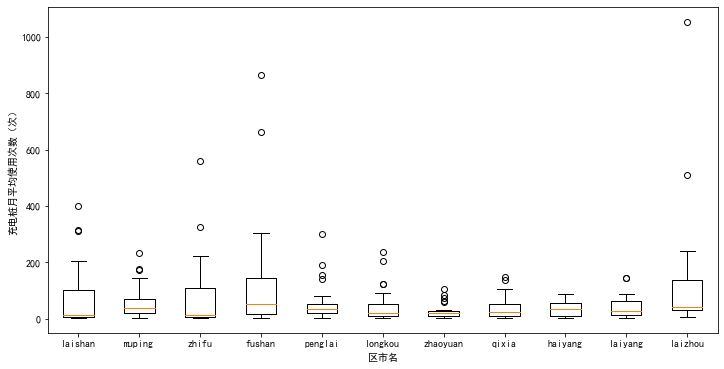

In [91]:
# 绘制箱线图
import matplotlib.pyplot as plt
#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei'] 
# 各区市名
district_name = ['laishan','muping','zhifu','fushan','penglai','longkou','zhaoyuan'
                 ,'qixia','haiyang','laiyang','laizhou']
plt.figure(figsize=(12,6))
plt.boxplot(data_boxplot, labels=district_name)
plt.xlabel('区市名')
plt.ylabel('充电桩月平均使用次数（次）')

<center> 图1.8 各区市充电桩月使用频率箱线图

同样，用箱线图绘制各区市每次充电量情况，实现代码如下。从图中可以看出，单次充电量存在一些被划定为异常点，可能的原因之一是电动公交车等大容量的充电情形。

In [92]:
# 删除充电量为零的充电站
data_power_per_char_time = [0]*len(data_all_districts)
for i in range(len(data_all_districts)):
    data_power_per_char_time[i] = data_all_districts[i].drop(data_all_districts[i][data_all_districts[i]['Unit_per_Cha_time']==0].index).Unit_per_Cha_time

Text(0, 0.5, '单次充电量(kWh)')

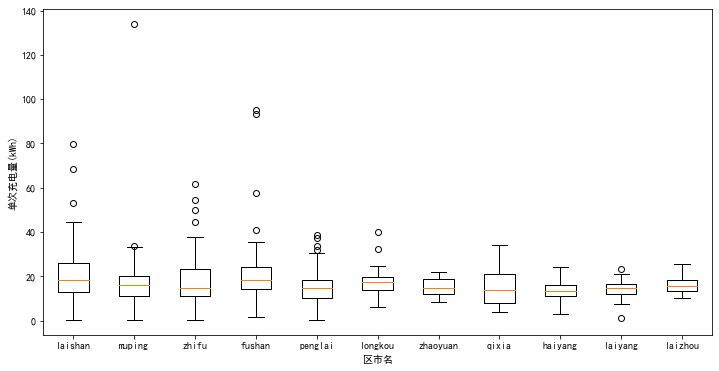

In [93]:
# 绘制单次充电量
plt.figure(figsize=(12,6))
plt.boxplot(data_power_per_char_time, labels=district_name)
plt.xlabel('区市名')
plt.ylabel('单次充电量(kWh)')

<center> 图1.9 各区市单次充电充电量

接着，绘制各充电桩月充电量。月充电量的大小反映了各桩的使用率信息。实现代码如下。

In [94]:
data_power_per_char_pile = [0]*len(data_all_districts)
for i in range(len(data_all_districts)):
    data_power_per_char_pile[i] = data_all_districts[i].drop(data_all_districts[i][data_all_districts[i]['Unit_per_Cha_time']==0].index).Unit_per_Cha_pile

Text(0, 0.5, '各桩月均充电量(kWh)')

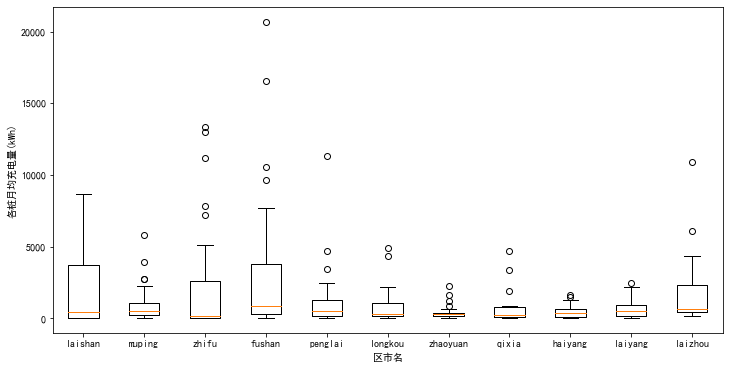

In [95]:
plt.figure(figsize=(12,6))
plt.boxplot(data_power_per_char_pile, labels=district_name)
plt.xlabel('区市名')
plt.ylabel('各桩月均充电量(kWh)')

<center> 图1.10 各区市各桩月充电量箱线图

各区市充电站数量和总充电桩数量可以体现区域发展情况，由以下代码实现，分别绘制了柱状统计图。

In [96]:
# 统计各区市充电桩总数量
total_num_piles = [0]*len(data_all_districts)
for i in range(len(data_all_districts)):
    total_num_piles[i] = data_all_districts[i]['Number_charging_piles'].sum()

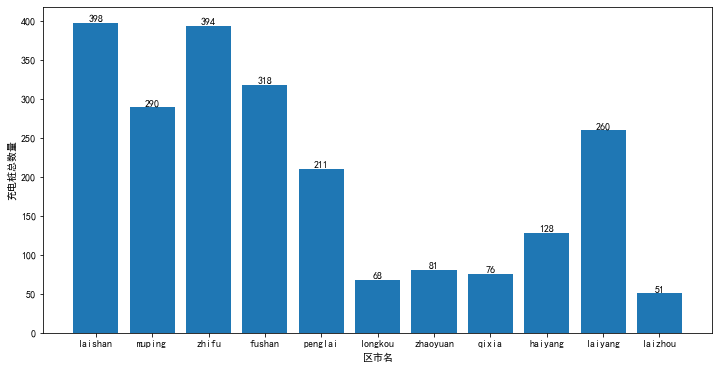

In [97]:
# 绘制柱状图
plt.figure(figsize=(12,6))
plt.bar(district_name, total_num_piles, tick_label=district_name)
plt.xlabel('区市名')
plt.ylabel('充电桩总数量')
for a,b in zip(district_name, total_num_piles):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )

<center> 图1.11 各区市总充电桩数量

In [98]:
# 汇总各区市总充电站数量
total_num_stations = [0]*len(data_all_districts)
for i in range(len(data_all_districts)):
    total_num_stations[i] = data_all_districts[i]['Station_name'].count()

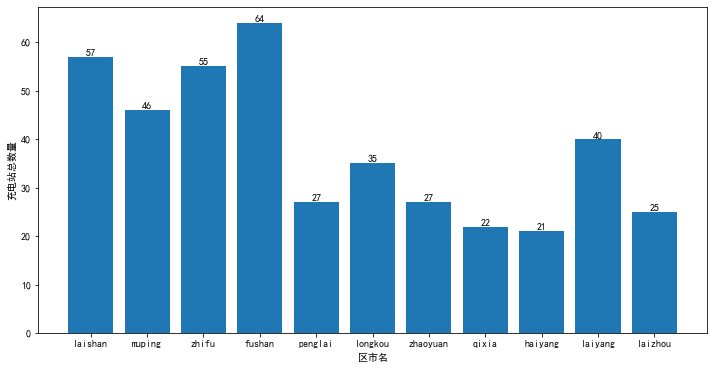

In [99]:
# 汇总各区市总充电站数量柱状图
plt.figure(figsize=(12,6))
plt.bar(district_name, total_num_stations, tick_label=district_name)
plt.xlabel('区市名')
plt.ylabel('充电站总数量')
for a,b in zip(district_name, total_num_stations):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )

<center> 图1.12 各区市总充电站数量

# 莱山区各充电站数据分析

莱山区的充电桩规划为本竞赛的目的，本章节将对莱山区的充电桩现状进行更为详细的分析，为下一章节充电桩未来发展提供依据。

In [100]:
# 计算莱山区充电桩总数
num_stations_laishan = total_num_stations[0]
# 展示莱山区充电站数据表
data_laishan.head()

Unnamed: 0   Station_name district  year_month  power_consum（kWh）  \
0            0      烟台高新区公交场站      莱山区      202109          147737.44   
2            2     烟台莱山长宁路充电站      莱山区      202109          125802.78   
13          13  山东省烟台市莱山光华充电站      莱山区      202109           64413.98   
14          14      烟台朱塂堡公交场站      莱山区      202109           58316.32   
16          16    烟台上海滩花园公交场站      莱山区      202109           51615.61   

    times_charging  Number_charging_piles   latitude   longitude  \
0             1857                     17  37.411116  121.530138   
2             5098                     25  37.447031  121.438939   
13            3201                      8  37.467384  121.443810   
14            2191                      7  37.351410  121.350403   
16             968                      8  37.440314  121.462538   

    Unit_per_Cha_time  Unit_per_Cha_pile  month_use_frequency_per_pile  
0               79.56            8690.44                           109  
2               24.68            5032.11                           204  
13              20.12            8051.75                           400  
14              26.62            8330.90                           313  
16              53.32            6451.95                           121

莱山区各充电站数量展示由下列代码实现。

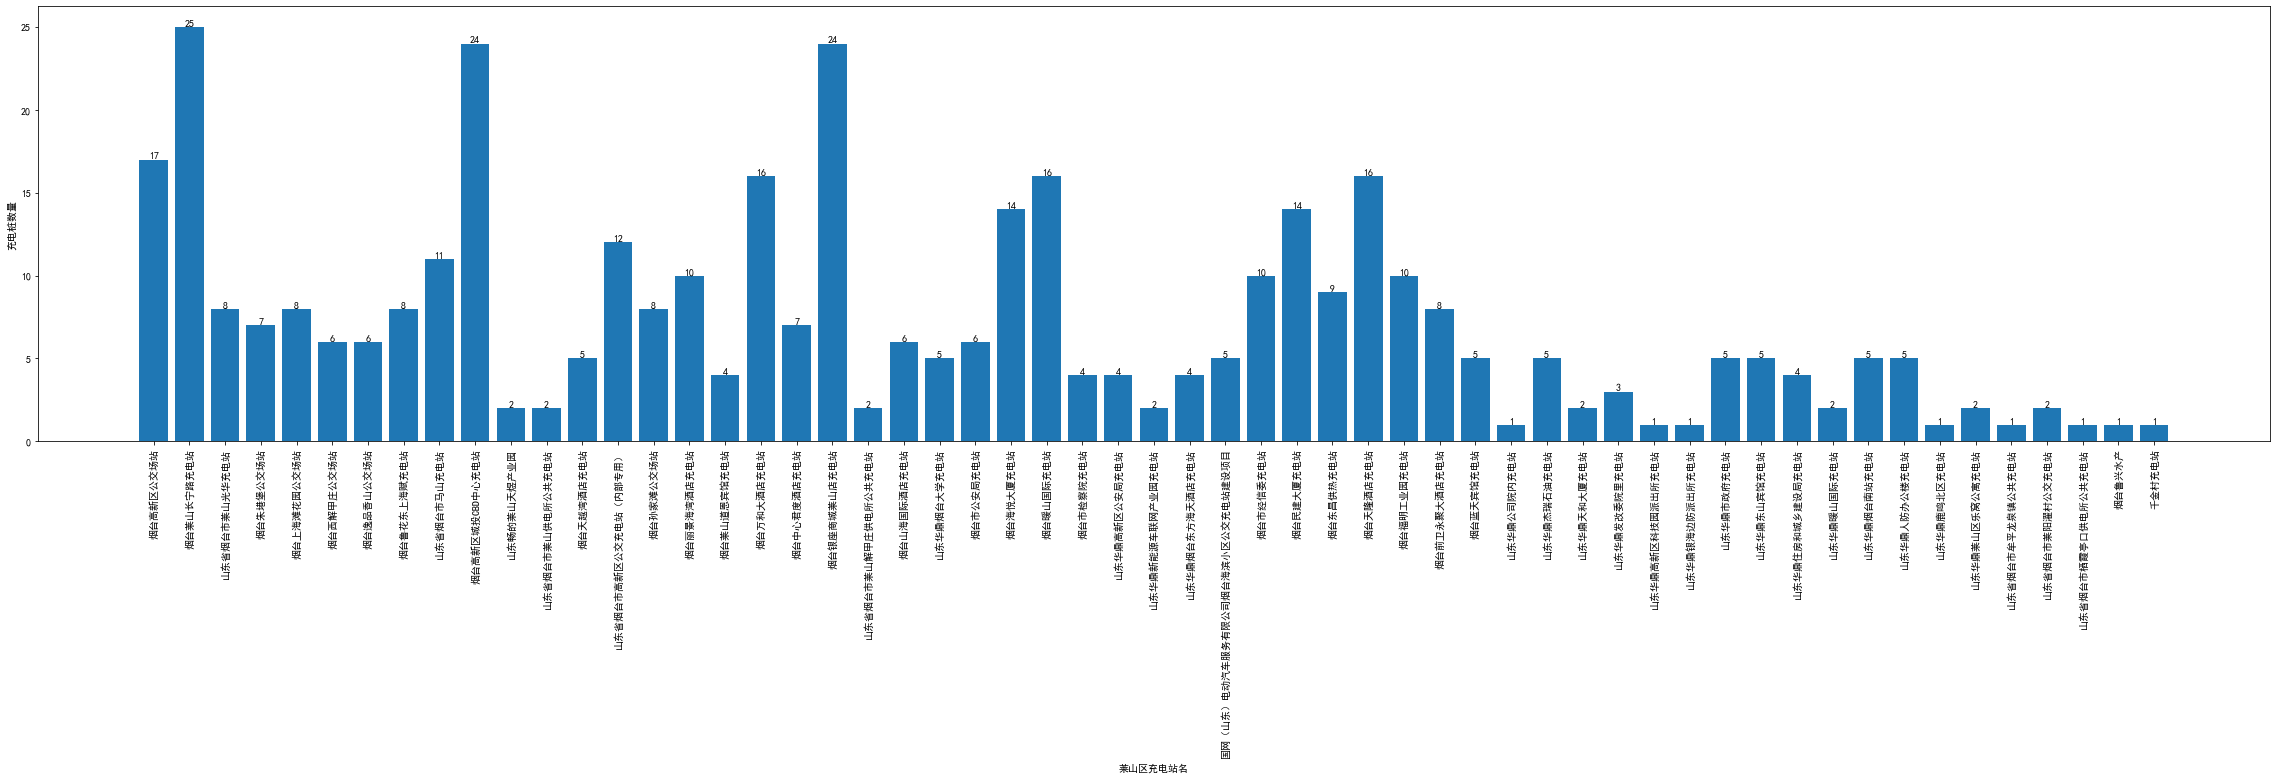

In [101]:
# charging piles number
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
plt.figure(figsize=(40,8))
plt.bar(data_laishan['Station_name'], data_laishan['Number_charging_piles'], tick_label=data_laishan['Station_name'])
plt.xlabel('莱山区充电站名')
plt.ylabel('充电桩数量')
for a,b in zip(data_laishan['Station_name'], data_laishan['Number_charging_piles']):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
plt.xticks(rotation = 90)
import warnings
warnings.filterwarnings('ignore')

<center> 图2.1 莱山区各充电站充电桩数量

各充电站月使用频率由以下代码实现。

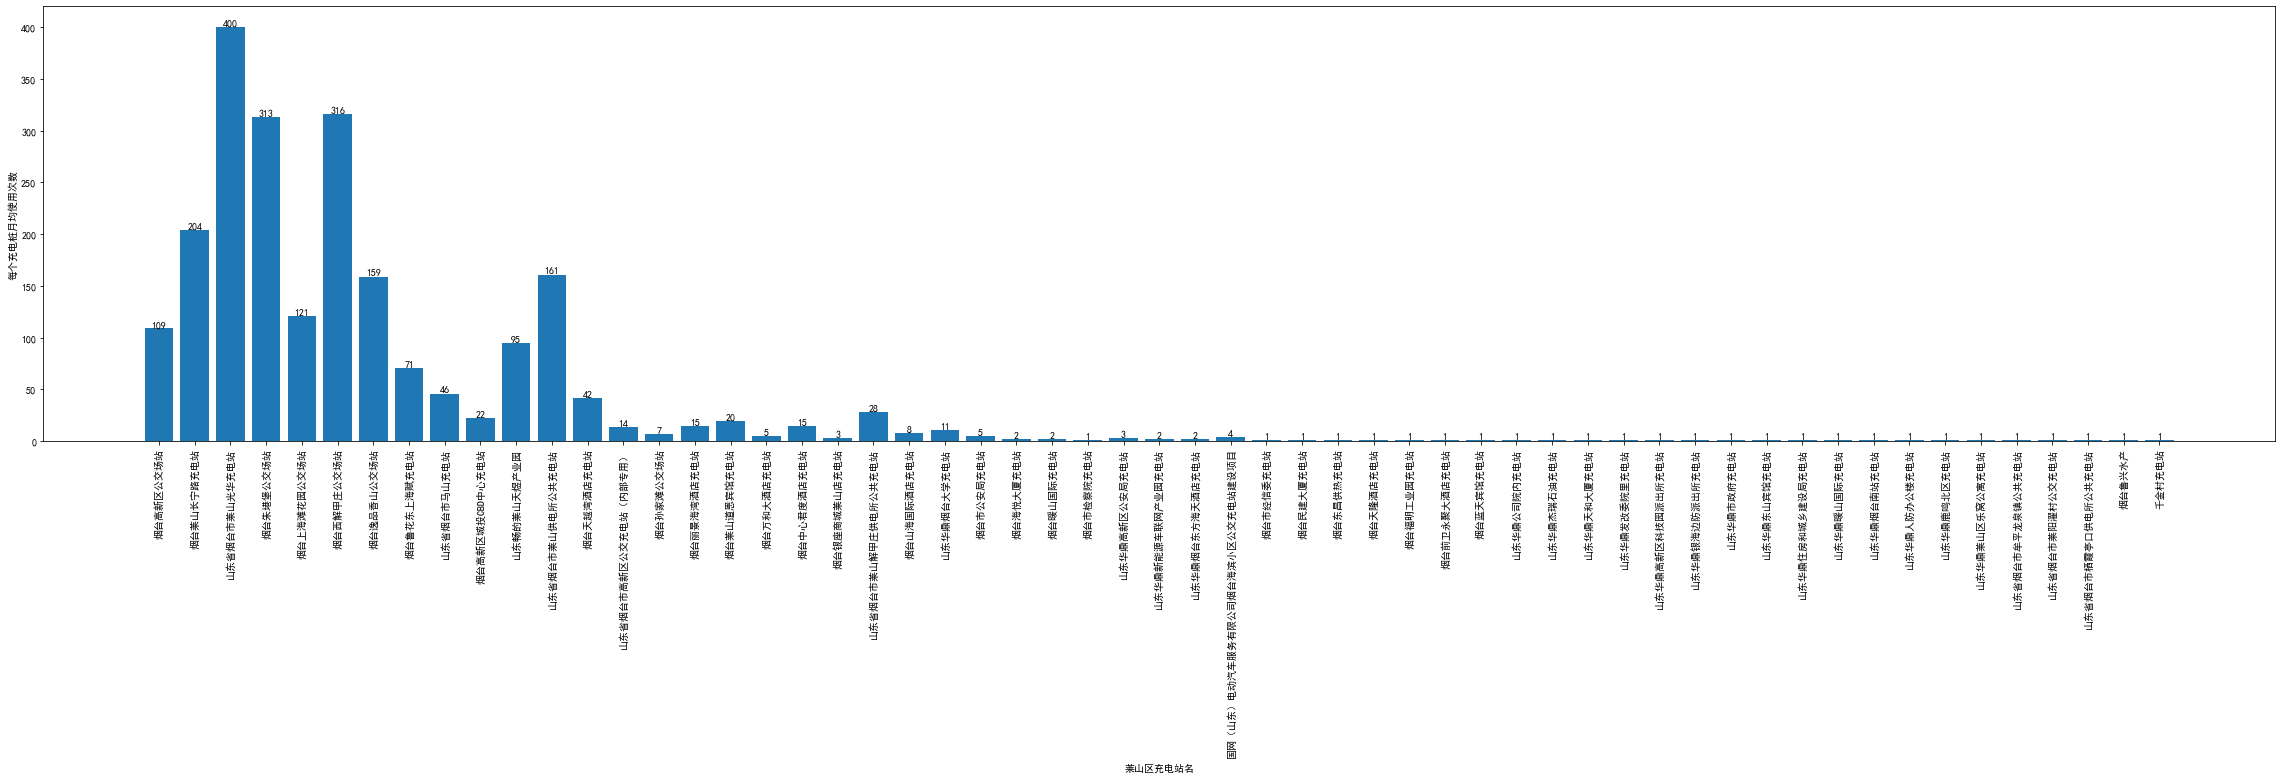

In [102]:
# 绘制月使用频率图
plt.figure(figsize=(40,8))
plt.bar(data_laishan['Station_name'], data_laishan['month_use_frequency_per_pile'], tick_label=data_laishan['Station_name'])
plt.xlabel('莱山区充电站名')
plt.ylabel('每个充电桩月均使用次数')
for a,b in zip(data_laishan['Station_name'], data_laishan['month_use_frequency_per_pile']):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
plt.xticks(rotation = 90)
import warnings
warnings.filterwarnings('ignore')

<center> 图2.2 莱山区充电桩月均使用次数

同样，绘制各充电站地理位置。

In [103]:
# 绘制各充电站地理位置
laishan_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
incidents_laishan =plugins.MarkerCluster().add_to(laishan_map)
for lat, lng, name in zip(data_laishan.latitude, data_laishan.longitude, data_laishan.Station_name):
    incidents_laishan.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4,
            popup=name     
        )
    )
circleMarker_laishan = basic_map()
circleMarker_laishan.add_child(incidents_laishan)

![jupyter](莱山区充电站位置.png)

<center> 图2.3 莱山区充电站位置

绘制莱山区充电桩数量、使用频率、单次充电量等热图。

In [104]:
# 绘制热图
heatMap_laishan = circleMarker_laishan
heatdata = data_laishan[['latitude','longitude','Number_charging_piles']].values.tolist()
HeatMap(heatdata).add_to(heatMap_laishan)
heatMap_laishan

![jupyter](莱山区充电站热图.png)

<center> 图2.4 莱山区充电桩数量热图

In [105]:
# 充电桩月使用频率热图
heatMap_use_frequncy_laishan = circleMarker_laishan
heatdata = data_laishan[['latitude','longitude','month_use_frequency_per_pile']].values.tolist()
HeatMap(heatdata).add_to(heatMap_use_frequncy_laishan)
heatMap_use_frequncy_laishan

![jupyter](莱山区月使用频率热图.png)

<center> 图2.5 莱山区充电桩月使用频率热图

In [106]:
# heatmap of power use of each charging time
heatMap_power_use_times_laishan = circleMarker_laishan
heatdata = data_laishan[['latitude','longitude','Unit_per_Cha_time']].values.tolist()
HeatMap(heatdata).add_to(heatMap_power_use_times_laishan)
heatMap_power_use_times_laishan

![jupyter](莱山区单次充电量热图.png)

<center> 图2.6 莱山区单次充电量热图

In [107]:
# 各充电桩月均充电量热图
heatMap_power_use_piles_laishan = circleMarker_laishan
heatdata = data_laishan[['latitude','longitude','Unit_per_Cha_pile']].values.tolist()
HeatMap(heatdata).add_to(heatMap_power_use_piles_laishan)
heatMap_power_use_piles_laishan

![jupyter](莱山区单桩月约充电量.png)

<center> 图2.7莱山区单桩月约充电量

# 方案A：莱山区充电桩未来发展规划（2021，2025，2030）, 在已有充电站基础上规划充电桩

方案A是在已有充电站选址的基础上，规划不同站点充电桩数量的未来发展情况，方案A中假设各站点历史充电需求即为莱山区各地点实际充电需求，也不新增加充电站（或新增加的充电站与原有充电站距离小于一定距离，例如小于100m），在原有充电站基础上，根据实际充电需求，增加各个充电站的充电桩安装数量。

In [108]:
# 显示部分莱山区数据信息情况
data_laishan.head()

Unnamed: 0   Station_name district  year_month  power_consum（kWh）  \
0            0      烟台高新区公交场站      莱山区      202109          147737.44   
2            2     烟台莱山长宁路充电站      莱山区      202109          125802.78   
13          13  山东省烟台市莱山光华充电站      莱山区      202109           64413.98   
14          14      烟台朱塂堡公交场站      莱山区      202109           58316.32   
16          16    烟台上海滩花园公交场站      莱山区      202109           51615.61   

    times_charging  Number_charging_piles   latitude   longitude  \
0             1857                     17  37.411116  121.530138   
2             5098                     25  37.447031  121.438939   
13            3201                      8  37.467384  121.443810   
14            2191                      7  37.351410  121.350403   
16             968                      8  37.440314  121.462538   

    Unit_per_Cha_time  Unit_per_Cha_pile  month_use_frequency_per_pile  
0               79.56            8690.44                           109  
2               24.68            5032.11                           204  
13              20.12            8051.75                           400  
14              26.62            8330.90                           313  
16              53.32            6451.95                           121

## 2021充电桩规划
对莱山区充电站进行筛选，筛选出充电桩月均使用频率大于10的充电桩的定位，实现代码如下。

In [109]:
# 实例化地图
incidents_demand_point_high_use_frequecy = folium.map.FeatureGroup()
# 指定月均使用频率
month_use_frequency = 10
data_high_use_frequency = data_laishan[data_laishan['month_use_frequency_per_pile']>month_use_frequency]
# 定位
for lat, lng, name in zip(data_high_use_frequency.latitude, data_high_use_frequency.longitude, data_high_use_frequency.Number_charging_piles):
    incidents_demand_point_high_use_frequecy.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4,
            popup=name
            
        )
    )

# Add incidents to map
basic_map().add_child(incidents_demand_point_high_use_frequecy)

![jupyter](莱山区高使用率充电站.png)

<center> 图3.1 莱山区使用频率较高充电站

In [110]:
# 数据展示
data_high_use_frequency.head()

Unnamed: 0   Station_name district  year_month  power_consum（kWh）  \
0            0      烟台高新区公交场站      莱山区      202109          147737.44   
2            2     烟台莱山长宁路充电站      莱山区      202109          125802.78   
13          13  山东省烟台市莱山光华充电站      莱山区      202109           64413.98   
14          14      烟台朱塂堡公交场站      莱山区      202109           58316.32   
16          16    烟台上海滩花园公交场站      莱山区      202109           51615.61   

    times_charging  Number_charging_piles   latitude   longitude  \
0             1857                     17  37.411116  121.530138   
2             5098                     25  37.447031  121.438939   
13            3201                      8  37.467384  121.443810   
14            2191                      7  37.351410  121.350403   
16             968                      8  37.440314  121.462538   

    Unit_per_Cha_time  Unit_per_Cha_pile  month_use_frequency_per_pile  
0               79.56            8690.44                           109  
2               24.68            5032.11                           204  
13              20.12            8051.75                           400  
14              26.62            8330.90                           313  
16              53.32            6451.95                           121

为充电站充电情况定义相关指标，如下：   
需求因素指标（demand factor），使用率（time_use_efficiency），以及需增加的电动桩数量（piles_add_number）。    
在我们方案设计中，我们假设当使用率大于1时（具体数字可根据实际需求进行调整），需要在原来充电桩的基础上新安装充电桩，安装数量由充电需求决定。

In [111]:
# 计算需求因素指标
data_high_use_frequency['demand factor'] = (data_high_use_frequency['month_use_frequency_per_pile']/3).astype(int)
# difine the indexes to judge the stations efficiency/overload or not, 5 means charging 5 hours per time, usually, 2 hours can be full charged with public charging pile
# but custermer won't remove the EV cars imediately, so we assume 5 hours per charging time, if time_use_efficiency>1 means that more charging piles should be installed
# otherwise, no more charging piles are needed
# 根据调研数据，假设每次充电时长（包括EV停留时间）为5小时（duration=5 ）
duration = 5
# 计算使用效率
data_high_use_frequency['time_use_efficiency'] = (data_high_use_frequency['month_use_frequency_per_pile']/30)*duration/24
# 当使用率大于1时，需要增加充电桩数量
station_add_piles = data_high_use_frequency[data_high_use_frequency['time_use_efficiency']>1.0]
station_add_piles['piles_add_number'] = np.ceil(station_add_piles['times_charging']*duration/(30*24)-station_add_piles['Number_charging_piles']).astype(int)

在现在充电桩充电情况下（2021），需要新增充电桩的充电站信息表如下。

In [112]:
station_add_piles.head(10)

Unnamed: 0      Station_name district  year_month  power_consum（kWh）  \
2            2        烟台莱山长宁路充电站      莱山区      202109          125802.78   
13          13     山东省烟台市莱山光华充电站      莱山区      202109           64413.98   
14          14         烟台朱塂堡公交场站      莱山区      202109           58316.32   
18          18        烟台西解甲庄公交场站      莱山区      202109           49071.64   
30          30        烟台逸品香山公交场站      莱山区      202109           29516.10   
65          65  山东省烟台市莱山供电所公共充电站      莱山区      202109            6546.01   

    times_charging  Number_charging_piles   latitude   longitude  \
2             5098                     25  37.447031  121.438939   
13            3201                      8  37.467384  121.443810   
14            2191                      7  37.351410  121.350403   
18            1898                      6  37.388390  121.492616   
30             956                      6  37.393285  121.429032   
65             322                      2  37.393078  121.383545   

    Unit_per_Cha_time  Unit_per_Cha_pile  month_use_frequency_per_pile  \
2               24.68            5032.11                           204   
13              20.12            8051.75                           400   
14              26.62            8330.90                           313   
18              25.85            8178.61                           316   
30              30.87            4919.35                           159   
65              20.33            3273.01                           161   

    demand factor  time_use_efficiency  piles_add_number  
2              68             1.416667                11  
13            133             2.777778                15  
14            104             2.173611                 9  
18            105             2.194444                 8  
30             53             1.104167                 1  
65             53             1.118056                 1

绘制2021年充电站需要新增充电桩数量。

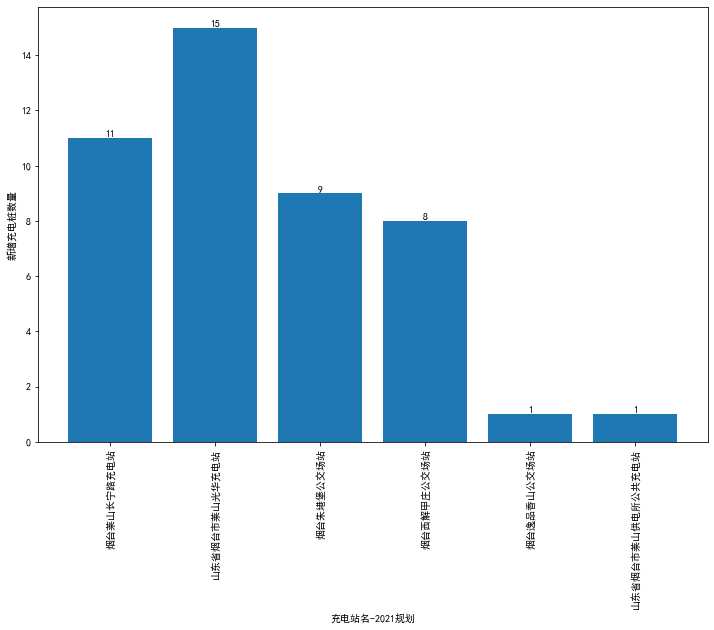

In [113]:
# 绘制柱状图
plt.figure(figsize=(12,8))
plt.bar(station_add_piles['Station_name'], station_add_piles['piles_add_number'], tick_label=station_add_piles['Station_name'])
plt.xlabel('充电站名-2021规划')
plt.ylabel('新增充电桩数量')
plt.xticks(rotation = 90)
for a,b in zip(station_add_piles['Station_name'], station_add_piles['piles_add_number']):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )

<center> 图3.2 新增充电桩数量-2021

## 2025充电桩规划

方案根据我国未来电动汽车的发展速度，对莱山区2025年充电桩规划。根据调研信息，2025年我国电动车保有量为2021年的3倍左右。https://www.idc.com/getdoc.jsp?containerId=prCHC47071920,https://www.canalys.com/newsroom/canalys-%E7%BB%8F%E5%8E%86%E9%80%82%E5%BA%A6%E5%A2%9E%E9%95%BF%E7%9A%842020%E5%B9%B4%E5%90%8E。    
说明：下列程序计算时，充电桩的发展速度可根据实际发展进行调整，得出不同发展速度下所需的新增充电桩数量。

In [114]:
data_laishan['time_use_efficiency'] = (data_laishan['month_use_frequency_per_pile']/30)*duration/24

In [115]:
# 计算莱山区2025年充电桩需求情况
increase_rate_2025 = 3
data_laishan_2025 = data_laishan
data_laishan_2025['month_use_frequency_per_pile'] = data_laishan_2025['month_use_frequency_per_pile']*increase_rate_2025
data_laishan_2025['time_use_efficiency'] = (data_laishan_2025['month_use_frequency_per_pile']/30)*duration/24

In [116]:
# 计算从2021年到2025年，充电桩新增需求量
station_add_piles_2025 = data_laishan_2025[data_laishan_2025['time_use_efficiency']>1.0]
station_add_piles_2025['piles_add_number'] = np.ceil(station_add_piles_2025['times_charging']*increase_rate_2025*duration/(30*24)-station_add_piles_2025['Number_charging_piles']).astype(int)

2025年充电桩发展情况，以及需要新增充电桩的充电站信息表如下，并绘制新增需求图。

In [117]:
station_add_piles_2025.head(57)

Unnamed: 0      Station_name district  year_month  power_consum（kWh）  \
0            0         烟台高新区公交场站      莱山区      202109          147737.44   
2            2        烟台莱山长宁路充电站      莱山区      202109          125802.78   
13          13     山东省烟台市莱山光华充电站      莱山区      202109           64413.98   
14          14         烟台朱塂堡公交场站      莱山区      202109           58316.32   
16          16       烟台上海滩花园公交场站      莱山区      202109           51615.61   
18          18        烟台西解甲庄公交场站      莱山区      202109           49071.64   
30          30        烟台逸品香山公交场站      莱山区      202109           29516.10   
53          53       烟台鲁花东上海赋充电站      莱山区      202109            9792.35   
61          61       山东畅的莱山天煜产业园      莱山区      202109            8409.60   
65          65  山东省烟台市莱山供电所公共充电站      莱山区      202109            6546.01   

    times_charging  Number_charging_piles   latitude   longitude  \
0             1857                     17  37.411116  121.530138   
2             5098                     25  37.447031  121.438939   
13            3201                      8  37.467384  121.443810   
14            2191                      7  37.351410  121.350403   
16             968                      8  37.440314  121.462538   
18            1898                      6  37.388390  121.492616   
30             956                      6  37.393285  121.429032   
53             564                      8  37.522659  121.442859   
61             189                      2  37.411027  121.416223   
65             322                      2  37.393078  121.383545   

    Unit_per_Cha_time  Unit_per_Cha_pile  month_use_frequency_per_pile  \
0               79.56            8690.44                           327   
2               24.68            5032.11                           612   
13              20.12            8051.75                          1200   
14              26.62            8330.90                           939   
16              53.32            6451.95                           363   
18              25.85            8178.61                           948   
30              30.87            4919.35                           477   
53              17.36            1224.04                           213   
61              44.50            4204.80                           285   
65              20.33            3273.01                           483   

    time_use_efficiency  piles_add_number  
0              2.270833                22  
2              4.250000                82  
13             8.333333                59  
14             6.520833                39  
16             2.520833                13  
18             6.583333                34  
30             3.312500                14  
53             1.479167                 4  
61             1.979167                 2  
65             3.354167                 5

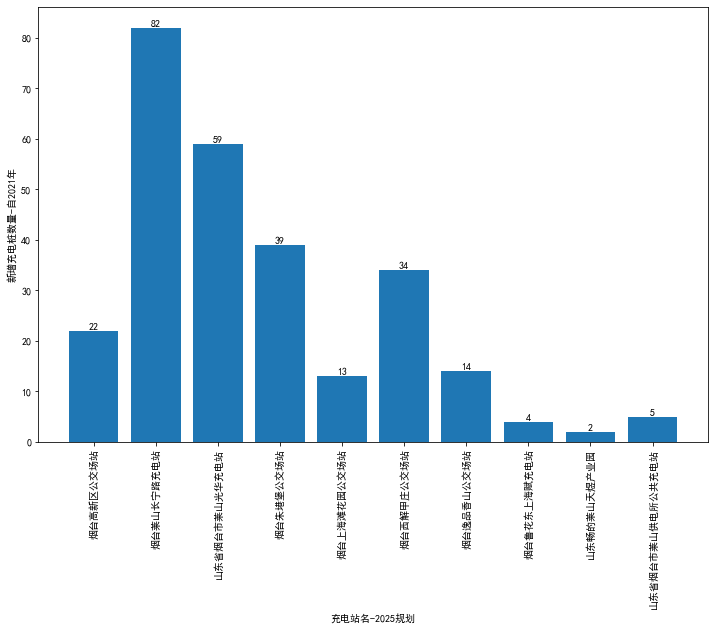

In [118]:
# 绘制需求图
plt.figure(figsize=(12,8))
plt.bar(station_add_piles_2025['Station_name'], station_add_piles_2025['piles_add_number'], tick_label=station_add_piles_2025['Station_name'])
plt.xlabel('充电站名-2025规划')
plt.ylabel('新增充电桩数量-自2021年')
plt.xticks(rotation = 90)
for a,b in zip(station_add_piles_2025['Station_name'], station_add_piles_2025['piles_add_number']):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )

<center> 图3.3 新增充电桩数量-2025

## 2030充电桩规划

根据调研信息，2030年我国电动车保有量为2021年的6倍左右。参考数据链接：https://www.idc.com/getdoc.jsp?containerId=prCHC47071920,https://www.canalys.com/newsroom/canalys-%E7%BB%8F%E5%8E%86%E9%80%82%E5%BA%A6%E5%A2%9E%E9%95%BF%E7%9A%842020%E5%B9%B4%E5%90%8E。     
https://finance.sina.com.cn/chanjing/cyxw/2019-05-19/doc-ihvhiews2890186.shtml   
下列程序计算时，充电桩的发展速度可根据实际发展进行调整，得出不同发展速度下所需的新增充电桩数量。图中新增数量以2021年现有充电桩数量为基础，若2025年已经新增部分充电桩，则2030年实际新增数量需要减去2025年新增数量。图中负数表示可以适当减少的充电桩数量，表明该地区充电桩一直存在盈余现象。

In [119]:
# 计算充电需求
increase_rate_2030 = 6
data_laishan_2030 = data_laishan
data_laishan_2030['month_use_frequency_per_pile'] = data_laishan_2025['month_use_frequency_per_pile']*increase_rate_2030
data_laishan_2030['time_use_efficiency'] = (data_laishan_2030['month_use_frequency_per_pile']/30)*duration/24

In [120]:
# 计算所需增加充电桩数量
station_add_piles_2030 = data_laishan_2030[data_laishan_2030['time_use_efficiency']>1.0]
station_add_piles_2030['piles_add_number'] = np.ceil(station_add_piles_2030['times_charging']*increase_rate_2030*duration/(30*24)-station_add_piles_2030['Number_charging_piles']).astype(int)

In [121]:
# 展示需求列表
station_add_piles_2030.head(10)

Unnamed: 0     Station_name district  year_month  power_consum（kWh）  \
0            0        烟台高新区公交场站      莱山区      202109          147737.44   
2            2       烟台莱山长宁路充电站      莱山区      202109          125802.78   
13          13    山东省烟台市莱山光华充电站      莱山区      202109           64413.98   
14          14        烟台朱塂堡公交场站      莱山区      202109           58316.32   
16          16      烟台上海滩花园公交场站      莱山区      202109           51615.61   
18          18       烟台西解甲庄公交场站      莱山区      202109           49071.64   
30          30       烟台逸品香山公交场站      莱山区      202109           29516.10   
53          53      烟台鲁花东上海赋充电站      莱山区      202109            9792.35   
57          57      山东省烟台市马山充电站      莱山区      202109            9203.06   
60          60  烟台高新区城投CBD中心充电站      莱山区      202109            8828.70   

    times_charging  Number_charging_piles   latitude   longitude  \
0             1857                     17  37.411116  121.530138   
2             5098                     25  37.447031  121.438939   
13            3201                      8  37.467384  121.443810   
14            2191                      7  37.351410  121.350403   
16             968                      8  37.440314  121.462538   
18            1898                      6  37.388390  121.492616   
30             956                      6  37.393285  121.429032   
53             564                      8  37.522659  121.442859   
57             502                     11  37.417534  121.517010   
60             518                     24  37.449213  121.482192   

    Unit_per_Cha_time  Unit_per_Cha_pile  month_use_frequency_per_pile  \
0               79.56            8690.44                          1962   
2               24.68            5032.11                          3672   
13              20.12            8051.75                          7200   
14              26.62            8330.90                          5634   
16              53.32            6451.95                          2178   
18              25.85            8178.61                          5688   
30              30.87            4919.35                          2862   
53              17.36            1224.04                          1278   
57              18.33             836.64                           828   
60              17.04             367.86                           396   

    time_use_efficiency  piles_add_number  
0                13.625                61  
2                25.500               188  
13               50.000               126  
14               39.125                85  
16               15.125                33  
18               39.500                74  
30               19.875                34  
53                8.875                16  
57                5.750                10  
60                2.750                -2

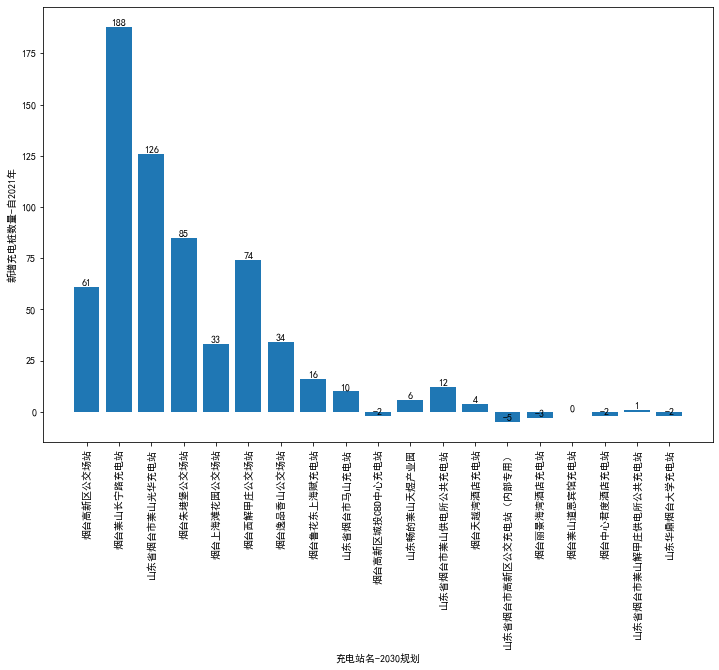

In [122]:
# 绘制需求图
plt.figure(figsize=(12,8))
plt.bar(station_add_piles_2030['Station_name'], station_add_piles_2030['piles_add_number'], tick_label=station_add_piles_2030['Station_name'])
plt.xlabel('充电站名-2030规划')
plt.ylabel('新增充电桩数量-自2021年')
plt.xticks(rotation = 90)
for a,b in zip(station_add_piles_2030['Station_name'], station_add_piles_2030['piles_add_number']):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )

<center> 图3.4 新增充电桩数量-2030

# 方案B：莱山区充电桩未来发展规划（2025，2030）, 选定新的充电站地址

关于计划B，新增的充电桩为选择新的安装地址，在此情况下，需要调研信息包括莱山区人流/车流密度，准确充电需求点及需求量，建筑分类等，可通过假设若干可能选址坐标，通过求解P-中值问题（P-median），得到全局下的最短距离选址情况。    
由于对基础所需数据要求较高，主办方未提供所需数据，也难以通过简单调研获取准确信息，因此，方案B在目前阶段，仅提供一个可行思路，并未提供量化的新增数量及所选地址情况。

P-中值模型建立需要的参数信息有：1、带经纬度的充电需求量；2、新设充电站选择经纬度；3、新增充电站及充电桩数量。
充电需求点到实际充电站的直线距离可根据以下代码进行计算。   
P-中值问题是NP-hard问题，即模型寻优计算所需计算资源会因变量维度增加而成指数增加。莱山区有若干个需求点和若干个充电站，无法直接求解P-中值问题，目前可通过启发式方法间接求解，包括贪心算法等。
http://doi.10.11860/ji.ssn.1673-0291.20200131;
http://dx.doi.org/10.1016/j.rser.2017.05.022;
https://doi.org/10.1016/j.rser.2021.111719.

若后期提供相应的所需数据，可对方案B进一步完善，得到未来发展的量化结果。

In [123]:
# 计算地图上两定位点距离矩阵代码示例 
import math

def get_distances(locs_1, locs_2):
    n_rows_1 = locs_1.shape[0]
    n_rows_2 = locs_2.shape[0]
    dists = np.empty((n_rows_1, n_rows_2))
    # The loops here are inefficient
    for i in range(n_rows_1):
        for j in range(n_rows_2):
            dists[i, j] = get_distance_from_lat_long(locs_1[i], locs_2[j])
    return dists*1.609344


def get_distance_from_lat_long(loc_1, loc_2):

    earth_radius = 3958.75

    lat_dif = math.radians(loc_1[0] - loc_2[0])
    long_dif = math.radians(loc_1[1] - loc_2[1])
    sin_d_lat = math.sin(lat_dif / 2)
    sin_d_long = math.sin(long_dif / 2)
    step_1 = (sin_d_lat ** 2) + (sin_d_long ** 2) * math.cos(math.radians(loc_1[0])) * math.cos(math.radians(loc_2[0])) 
    step_2 = 2 * math.atan2(math.sqrt(step_1), math.sqrt(1-step_1))
    dist = step_2 * earth_radius
    return dist

locations = np.array(data_high_use_frequency[['latitude','longitude']])
distance_matrix = get_distances(locations, locations)
print(f'the maximum distance is {distance_matrix.max()} km')
print(f'the average distance is {distance_matrix.mean()} km')

the maximum distance is 20.717927505163097 km
the average distance is 7.842522650069849 km


# 烟台地区各区市充电桩数据再分析，基于决赛额外追加数据情景

决赛阶段追加数据说明如下:
包括5个excel文件: 订单信息orderinfo_2.xlsx, 充电站stationinfo.xls, 充电设备equipmentinfo.xls, 充电设备接口connectorinfo.xls, 供应商apiinfo.xls  
订单信息文件提供了各充电桩的2021年各月份实时充电信息，即各订单信息，是分析的重点，结合充电站和充电设备文件，可筛选各充电站及其各充电桩年充电使用及营收情况，给出更精准的数据分析结果和充电桩未来发展规划建议。  
需要说明的是，分析过程中，订单信息数据可能未收集所有充电站2021年所有订单信息，缺失多少不得而知，为了更好的进行分析总结，未考虑大部分订单缺失的可能情况，假设订单数据收集基本完整，能够反应充电情况。

首先加载订单信息和充电站信息数据表，代码如下：

In [145]:
#加载追加数据表，路径信息根据个人电脑实际选择
form_1= pd.read_excel("C:\\Users\\Q\\OneDrive\\02_Programs\\2021-Data-competition-Shangdong\\烟台1-创意赛-城市新能源车充电桩安装位置规划\\决赛追加数据\\订单信息orderinfo_2.xlsx", header=1)
form_2 = pd.read_excel("C:\\Users\\Q\\OneDrive\\02_Programs\\2021-Data-competition-Shangdong\\烟台1-创意赛-城市新能源车充电桩安装位置规划\\决赛追加数据\\充电站stationinfo.xls", header=1)

展示订单信息orderinfo_2.xlsx数据结构

In [146]:
form_1.head(5)

StartChargeSeq  ConnectorID            StartTime  \
0        00072E1E1D993E01  202001033G0  2021-03-17 17:45:30   
1  0105350300210424203655    010535030  2021-04-24 20:36:55   
2  0105350301210320200904    010535031  2021-03-20 20:09:04   
3  0105350301210327184955    010535031  2021-03-27 18:49:55   
4  0105350301210404215143    010535031  2021-04-04 21:51:43   

               EndTime  TotalPower  TotalElecMoney  TotalSeviceMoney  \
0  2021-03-17 20:41:37       16.70           21.53               0.0   
1  2021-04-25 06:36:20       42.44            0.00               0.0   
2  2021-03-20 23:43:02       22.45           17.96               0.0   
3  2021-03-28 01:13:12       43.24           34.59               0.0   
4  2021-04-05 03:16:02       36.30           29.04               0.0   

   TotalMoney  StopReason  SumPeriod  ChargeDetails  
0       21.53           5        NaN            NaN  
1        0.00           5        NaN            NaN  
2       17.96           5        NaN            NaN  
3       34.59           5        NaN            NaN  
4       29.04           5        NaN            NaN

展示订单信息充电站stationinfo.xls数据结构

In [143]:
form_2.head(5)

StationID    StationName  AreaCode               Address  \
0              MA01CF8F84974   烟台芝罘区通世南路充电站    370602       烟台市芝罘区通世南路朗郡停车场   
1        7884616611034179418  山东华鼎老市政府院里充电站    370602  烟台市芝罘区通世路111号政府礼堂停车场   
2        3958158013706020001      烟台阳光家居充电站    370602      山东省烟台市芝罘区芝罘屯路84号   
3        7884616611034999870   山东华鼎芝罘区政府充电站    370602          烟台市芝罘区市府街76号   
4  3354097802020082716322018        烟台浩福充电站    370602              山东烟台市芝罘区   

   StationType  StationStatus  StationLng  StationLat  Construction  \
0            1             50  121.381126   37.476558           255   
1            1             50  121.385803   37.527924             2   
2            1             50  121.365780   37.555369             3   
3            1             50  121.400131   37.540541             2   
4            1             50  121.373554   37.478788             1   

   OpenAllDay        BusineHours      ElectricityFee           ServiceFee  \
0           1  周一至周日,00:00-24:00                 0.4                 0.55   
1           1  00:00:00~23:59:59                1.10                  0.6   
2           1   周一至周日00:00-24:00  电费:00:00~24:00:1.2  服务费:00:00~24:00:0.6   
3           1  00:00:00~23:59:59                0.80                  0.6   
4           1        00:00-23:59                1.00                 0.30   

                                      EquipmentInfos  \
0  [{"EquipmentStatus":50,"ManufacturerName":"杭州中...   
1  [{"ManufacturerName":"武汉合康智能电气有限公司","Equipment...   
2  [{"EquipmentStatus":50,"ManufacturerName":"特来电...   
3  [{"ManufacturerName":"武汉合康智能电气有限公司","Equipment...   
4  [{"EquipmentStatus":50,"ManufacturerName":"科士达...   

                                         ConnectorID  
0  [[{"EquipmentStatus":50,"ManufacturerName":"杭州...  
1  [[{"ManufacturerName":"武汉合康智能电气有限公司","Equipmen...  
2  [[{"EquipmentStatus":50,"ManufacturerName":"特来...  
3  [[{"ManufacturerName":"武汉合康智能电气有限公司","Equipmen...  
4  [[{"EquipmentStatus":50,"ManufacturerName":"科士...

根据ConnectorID定位充电站名，添加到form_1表格中

In [234]:
# define a function to search for connectorID and find the station name
def find_stationName(connectorID='01222005048101'):
    form_2['Tor'] = form_2['EquipmentInfos'].apply(lambda x: connectorID in x)
    SN = form_2[form_2['Tor']==True]['StationName'].values
    return SN

In [250]:
# add the stationname column
import datetime
starttime = datetime.datetime.now()
form_1['StationName'] = form_1['ConnectorID'].apply(lambda x: find_stationName(x))
endtime = datetime.datetime.now()
print(endtime-starttime)

0:25:31.790674


各订单对应的充电站名称已添加到form_1数据表中。

In [575]:
form_1.head(5)

StartChargeSeq  ConnectorID            StartTime  \
0        00072E1E1D993E01  202001033G0  2021-03-17 17:45:30   
1  0105350300210424203655    010535030  2021-04-24 20:36:55   
2  0105350301210320200904    010535031  2021-03-20 20:09:04   
3  0105350301210327184955    010535031  2021-03-27 18:49:55   
4  0105350301210404215143    010535031  2021-04-04 21:51:43   

               EndTime  TotalPower  TotalElecMoney  TotalSeviceMoney  \
0  2021-03-17 20:41:37       16.70           21.53               0.0   
1  2021-04-25 06:36:20       42.44            0.00               0.0   
2  2021-03-20 23:43:02       22.45           17.96               0.0   
3  2021-03-28 01:13:12       43.24           34.59               0.0   
4  2021-04-05 03:16:02       36.30           29.04               0.0   

   TotalMoney  StopReason  SumPeriod ChargeDetails StationName  
0       21.53           5        NaN     [烟台浩福充电站]   [烟台浩福充电站]  
1        0.00           5        NaN    [君和新能源充电站]  [君和新能源充电站]  
2       17.96           5        NaN    [君和新能源充电站]  [君和新能源充电站]  
3       34.59           5        NaN    [君和新能源充电站]  [君和新能源充电站]  
4       29.04           5        NaN    [君和新能源充电站]  [君和新能源充电站]

从form_1中筛选重要的数据列，并保存于data_final数据表中，并进行重新排序，用于后期分析。

In [364]:
# resorting the columns
data_final = form_1[['ConnectorID', 'StationName', 'StartTime', 'EndTime', 'TotalPower',
       'TotalElecMoney', 'TotalSeviceMoney', 'TotalMoney', 'StopReason']]
data_final['StationName'] = data_final['StationName'].str[0]

ConnectorID   StationName            StartTime  \
0                      202001033G0       烟台浩福充电站  2021-03-17 17:45:30   
1                        010535030      君和新能源充电站  2021-04-24 20:36:55   
2                        010535031      君和新能源充电站  2021-03-20 20:09:04   
3                        010535031      君和新能源充电站  2021-03-27 18:49:55   
4                        010535031      君和新能源充电站  2021-04-04 21:51:43   
...                            ...           ...                  ...   
946465  12000000000000010290464002  君和新能源政府宾馆充电站  2021-12-07 18:39:38   
946466  12000000000000010290464001  君和新能源政府宾馆充电站  2021-12-13 14:21:16   
946467  12000000000000010290464001  君和新能源政府宾馆充电站  2021-12-16 20:36:00   
946468  12000000000000010290464001  君和新能源政府宾馆充电站  2021-12-17 17:32:08   
946469  12000000000000010290464002  君和新能源政府宾馆充电站  2021-12-17 17:35:12   

                    EndTime  TotalPower  TotalElecMoney  TotalSeviceMoney  \
0       2021-03-17 20:41:37       16.70           21.53              0.00   
1       2021-04-25 06:36:20       42.44            0.00              0.00   
2       2021-03-20 23:43:02       22.45           17.96              0.00   
3       2021-03-28 01:13:12       43.24           34.59              0.00   
4       2021-04-05 03:16:02       36.30           29.04              0.00   
...                     ...         ...             ...               ...   
946465  2021-12-07 19:16:08       21.54           14.00              9.21   
946466  2021-12-13 15:37:03       22.06           16.55              9.43   
946467  2021-12-16 21:37:14       34.95           26.21             14.94   
946468  2021-12-17 17:32:41        0.10            0.08              0.04   
946469  2021-12-17 17:46:53        6.54            4.91              2.80   

        TotalMoney  StopReason  
0            21.53           5  
1             0.00           5  
2            17.96           5  
3            34.59           5  
4            29.04           5  
...            ...         ...  
946465       23.21           5  
946466       25.98           5  
946467       41.15           5  
946468        0.12           5  
946469        7.71           5  

[946470 rows x 9 columns]

添加每个订单充电时长列，Totaltime，单位为分钟（minutes）

In [368]:
# add totaltime column
data_final['Totaltime'] = (pd.to_datetime(data_final['EndTime'])-pd.to_datetime(data_final['StartTime'])).apply(lambda x: x.seconds//60)
data_final = data_final[['ConnectorID', 'StationName', 'StartTime', 'EndTime','Totaltime', 'TotalPower'
                         ,'TotalElecMoney', 'TotalSeviceMoney', 'TotalMoney', 'StopReason']]
data_final

ConnectorID   StationName            StartTime  \
0                      202001033G0       烟台浩福充电站  2021-03-17 17:45:30   
1                        010535030      君和新能源充电站  2021-04-24 20:36:55   
2                        010535031      君和新能源充电站  2021-03-20 20:09:04   
3                        010535031      君和新能源充电站  2021-03-27 18:49:55   
4                        010535031      君和新能源充电站  2021-04-04 21:51:43   
...                            ...           ...                  ...   
946465  12000000000000010290464002  君和新能源政府宾馆充电站  2021-12-07 18:39:38   
946466  12000000000000010290464001  君和新能源政府宾馆充电站  2021-12-13 14:21:16   
946467  12000000000000010290464001  君和新能源政府宾馆充电站  2021-12-16 20:36:00   
946468  12000000000000010290464001  君和新能源政府宾馆充电站  2021-12-17 17:32:08   
946469  12000000000000010290464002  君和新能源政府宾馆充电站  2021-12-17 17:35:12   

                    EndTime  Totaltime  TotalPower  TotalElecMoney  \
0       2021-03-17 20:41:37        176       16.70           21.53   
1       2021-04-25 06:36:20        599       42.44            0.00   
2       2021-03-20 23:43:02        213       22.45           17.96   
3       2021-03-28 01:13:12        383       43.24           34.59   
4       2021-04-05 03:16:02        324       36.30           29.04   
...                     ...        ...         ...             ...   
946465  2021-12-07 19:16:08         36       21.54           14.00   
946466  2021-12-13 15:37:03         75       22.06           16.55   
946467  2021-12-16 21:37:14         61       34.95           26.21   
946468  2021-12-17 17:32:41          0        0.10            0.08   
946469  2021-12-17 17:46:53         11        6.54            4.91   

        TotalSeviceMoney  TotalMoney  StopReason  
0                   0.00       21.53           5  
1                   0.00        0.00           5  
2                   0.00       17.96           5  
3                   0.00       34.59           5  
4                   0.00       29.04           5  
...                  ...         ...         ...  
946465              9.21       23.21           5  
946466              9.43       25.98           5  
946467             14.94       41.15           5  
946468              0.04        0.12           5  
946469              2.80        7.71           5  

[946470 rows x 10 columns]

本竞赛主要是针对莱山区，因此筛选出所有莱山区充电订单信息，共有约16万条订单信息，保存于data_final_laishan中。

In [463]:
# screen the data from Laishan district
data_final_laishan = data_final[data_final['StationName'].apply(lambda x: str(x) in data_laishan['Station_name'].values)]
# add charing time column (Date)
data_final_laishan['Date'] = data_final_laishan['StartTime'].apply(lambda x: x[0:10])
data_final_laishan

ConnectorID  StationName            StartTime  \
3271                 001000042  烟台上海滩花园公交场站  2021-01-01 00:07:16   
3272                 001000042  烟台上海滩花园公交场站  2021-01-01 00:07:53   
3282                 001000042  烟台上海滩花园公交场站  2021-01-01 00:08:30   
3284                 001000031  烟台上海滩花园公交场站  2021-01-01 00:37:20   
3286                 000200051   烟台西解甲庄公交场站  2021-01-01 02:01:06   
...                        ...          ...                  ...   
926698  2018070213080470301421  山东畅的莱山天煜产业园  2021-12-17 10:41:39   
926702  2018070213080470301421  山东畅的莱山天煜产业园  2021-12-18 08:03:23   
926703  2018070213080470301421  山东畅的莱山天煜产业园  2021-12-19 07:50:56   
926708  2018070213080470301421  山东畅的莱山天煜产业园  2021-12-19 08:01:09   
926711  2018070213080470301421  山东畅的莱山天煜产业园  2021-12-20 07:53:10   

                    EndTime  Totaltime  TotalPower  TotalElecMoney  \
3271    2021-01-01 00:07:21          0        0.00            0.00   
3272    2021-01-01 00:07:58          0        0.00            0.00   
3282    2021-01-01 02:00:09        111      237.35           80.70   
3284    2021-01-01 02:19:07        101      196.76           66.90   
3286    2021-01-01 02:59:15         58       28.16            9.58   
...                     ...        ...         ...             ...   
926698  2021-12-17 16:50:37        368       52.70           52.70   
926702  2021-12-19 06:21:49       1338       59.20           59.20   
926703  2021-12-19 07:51:39          0        0.00            0.00   
926708  2021-12-19 16:43:55        522       38.50           38.50   
926711  2021-12-20 07:53:44          0        0.00            0.00   

        TotalSeviceMoney  TotalMoney  StopReason        Date  
3271                0.00        0.00           5  2021-01-01  
3272                0.00        0.00           5  2021-01-01  
3282                0.00       80.70           5  2021-01-01  
3284                0.00       66.90           5  2021-01-01  
3286                0.00        9.58           5  2021-01-01  
...                  ...         ...         ...         ...  
926698             26.35       79.05           5  2021-12-17  
926702             29.60       88.80           5  2021-12-18  
926703              0.00        0.00           5  2021-12-19  
926708             19.25       57.75           5  2021-12-19  
926711              0.00        0.00           5  2021-12-20  

[162860 rows x 11 columns]

在初赛数据表中，莱山区总充电站个数为57个，决赛阶段追加的数据中，通过订单分析，发现只有41个充电站有活跃订单信息，另外16个充电站无订单信息，可能是数据未上传，也有可能充电站未启用。以下分析假设订单信息收集基本完整，而未出现大面积订单未被统计的情形。  
以下代码通过对每个充电站订单数（充电次数）进行2021年全年分析，可以得到各充电站全年充电次数变化情况，从而可作为各充电站营收情况。    
根据全年逐天充电次数曲线，可分析出各充电站的运行转台。从下图5.1可以发现，有些充电站充电次数全年较为平稳，例如烟台西解甲庄公共场站，山东省烟台马山充电站，说明运营相对比较稳定；而有些充电站呈下降趋势，可能原因之一是充电桩故障未得到及时维修，例如烟台逸品香山公交站，烟台海悦大厦充电站，可对相应充电站点进行故障分析排查。

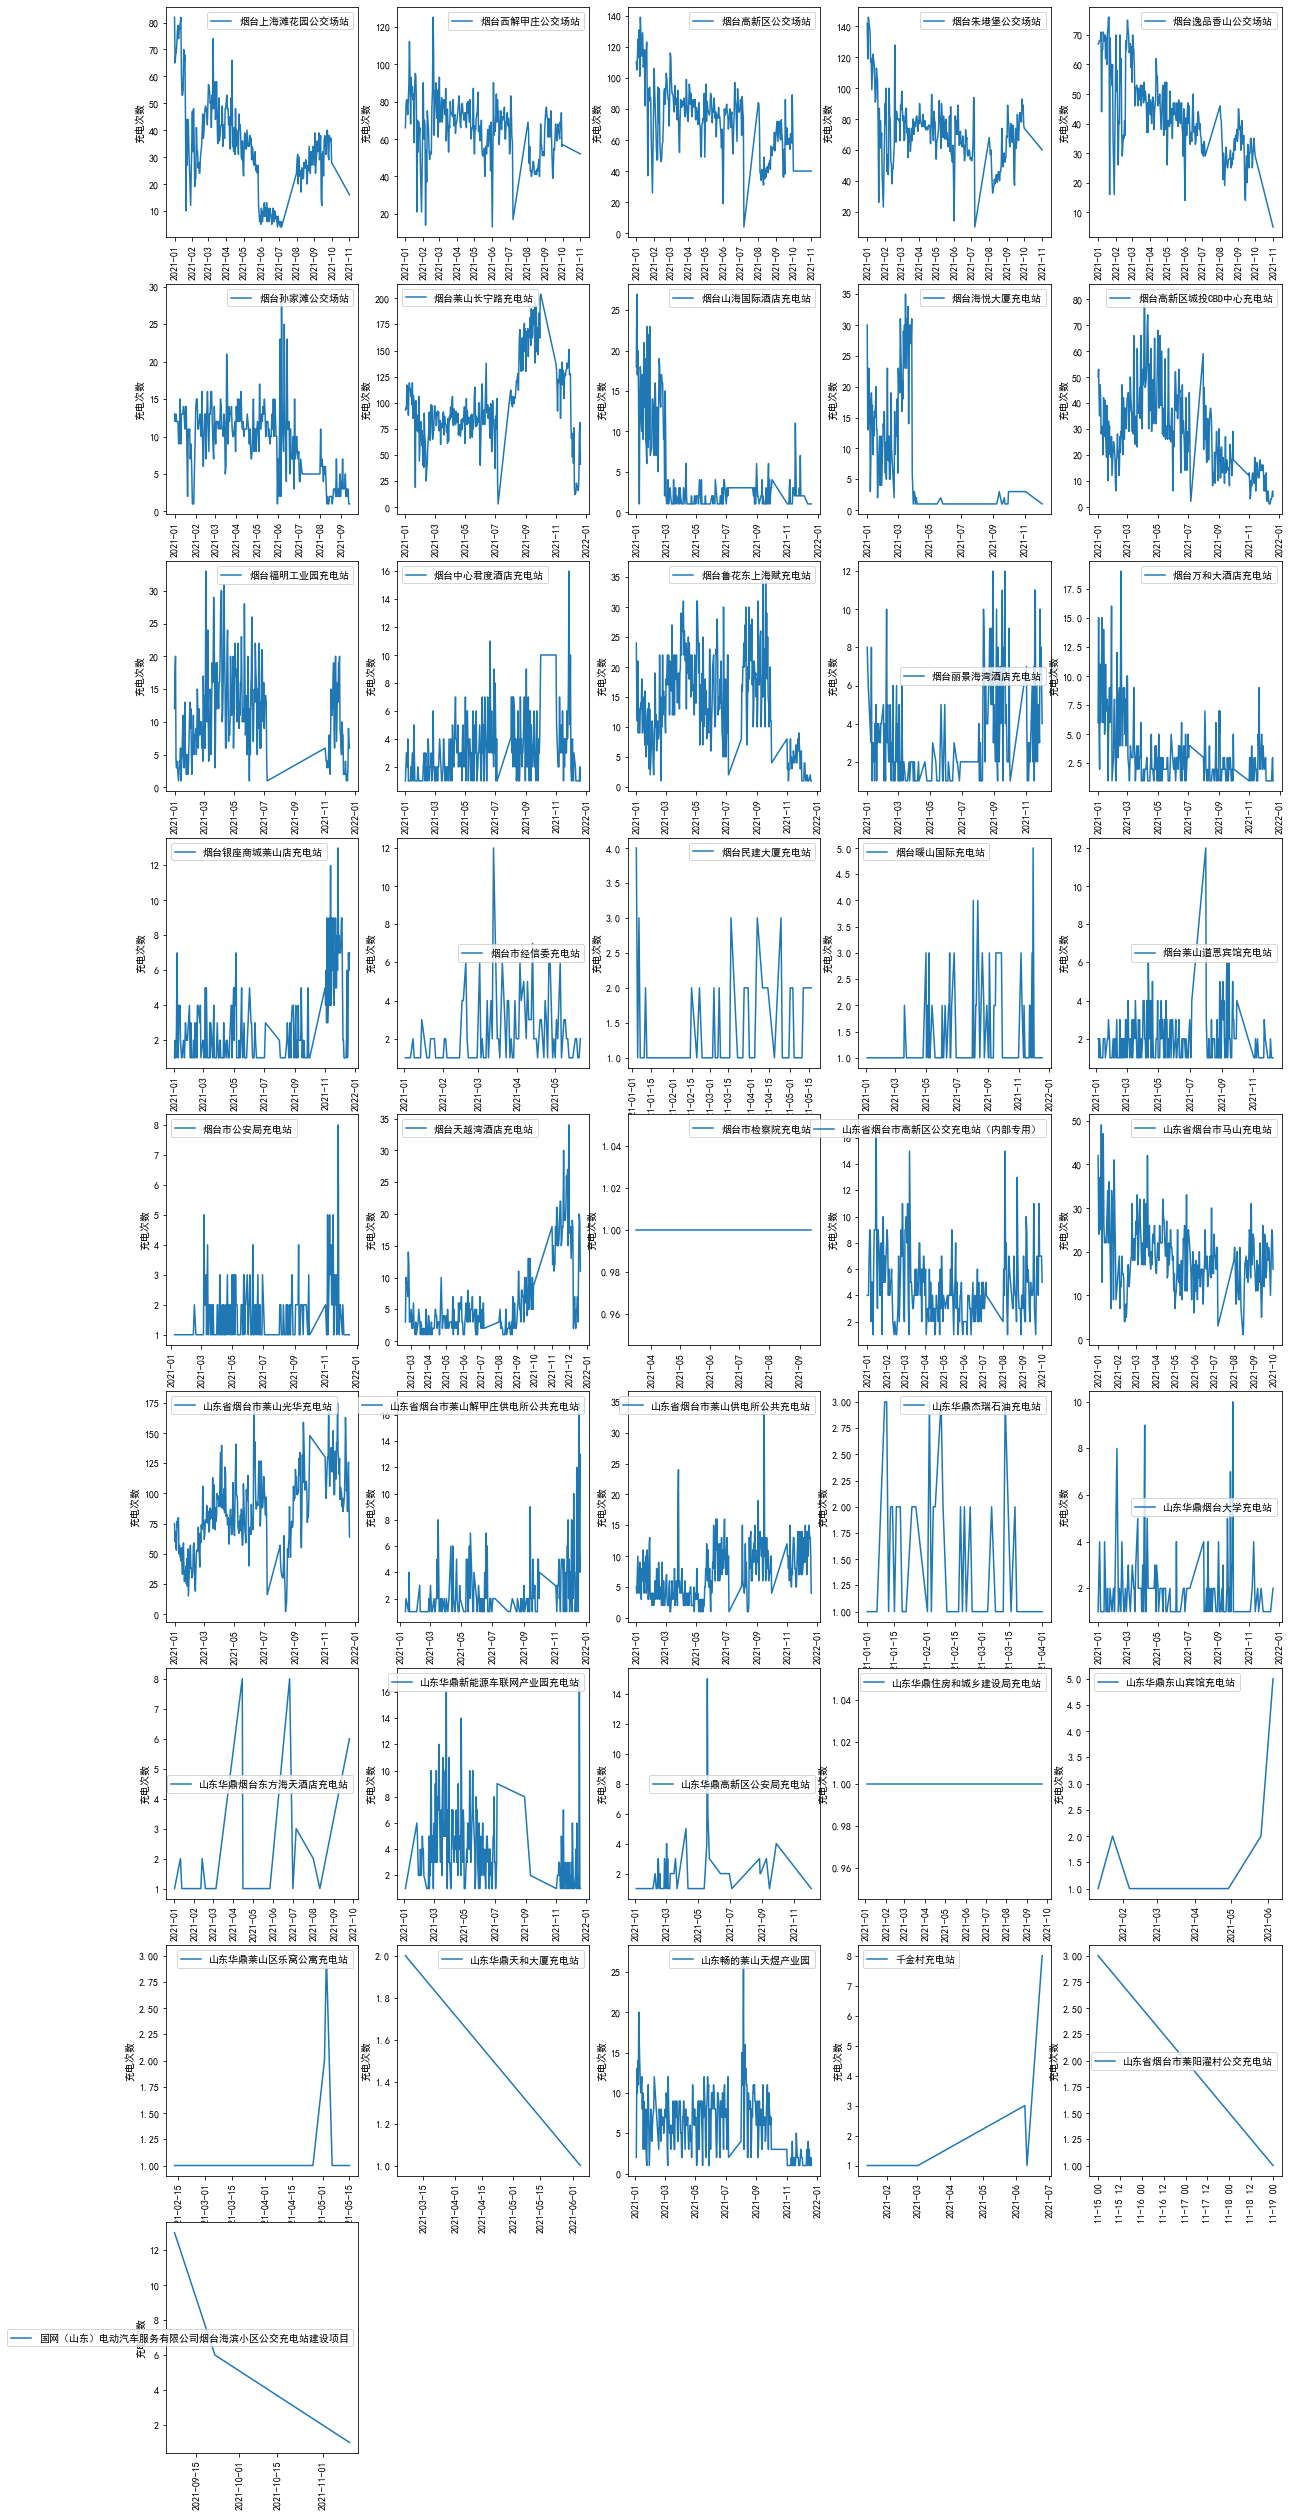

In [585]:
# plot charing time for each charging station of 2021
plt.figure(figsize=(20, 45))
for i,name in zip(range(41), data_final_laishan['StationName'].unique()):
    Data_fig = data_final_laishan[data_final_laishan['StationName']==name]
    plt.subplot(9, 5, 1 + i)
    plt.plot(pd.DataFrame(pd.to_datetime(Data_fig['Date']).value_counts()).sort_index(), label=name)
    plt.xticks(rotation=90)
    # plt.xlabel('时间（年月）')
    plt.ylabel('充电次数')
    plt.legend()

<center> 图5.1 莱山区各充电站2021年充电次数统计

每个站充电桩数量不同，以下代码块实现从初赛数据中摘取充电桩数量信息

In [437]:
# define a function to obtain the number of charging piles for each charing station
def get_charging_num(index=data_final_laishan_sum.index, name=['Number_charging_piles']):
    charging_num_total = []
    for i in zip(index):
        charging_num = data_laishan[data_laishan['Station_name']==i[0]][name].values
        charging_num_total = np.append(charging_num_total, charging_num)
    return charging_num_total.astype(int)

In [438]:
# sum up the charing time, charing power, incomes of each station
data_final_laishan_sum = data_final_laishan.groupby('StationName')['Totaltime','TotalPower','TotalMoney'].sum()
# add the charging piles number for each station
data_final_laishan_sum['Number_charging_piles'] = get_charging_num(index=data_final_laishan_sum.index)
data_final_laishan_sum

Totaltime  TotalPower  TotalMoney  \
StationName                                                          
千金村充电站                                  38        4.10        6.15   
国网（山东）电动汽车服务有限公司烟台海滨小区公交充电站建设项目         40        5.36        6.87   
山东华鼎东山宾馆充电站                            215       36.00        0.00   
山东华鼎住房和城乡建设局充电站                        283       55.40        0.00   
山东华鼎天和大厦充电站                            155       18.00        0.00   
山东华鼎新能源车联网产业园充电站                     69040    13397.40    11273.13   
山东华鼎杰瑞石油充电站                           9660     1059.20      139.32   
山东华鼎烟台东方海天酒店充电站                       2306      313.40       36.00   
山东华鼎烟台大学充电站                          30229     1871.10     2400.56   
山东华鼎莱山区乐窝公寓充电站                        2325      178.40      321.12   
山东华鼎高新区公安局充电站                         7361      664.20      361.76   
山东畅的莱山天煜产业园                         368378    75688.40   113529.95   
山东省烟台市莱山供电所公共充电站                    348233    43765.29    47568.13   
山东省烟台市莱山光华充电站                      1542954   492585.84   420469.88   
山东省烟台市莱山解甲庄供电所公共充电站                  79461     7435.40     8618.98   
山东省烟台市莱阳濯村公交充电站                          6        0.37        0.00   
山东省烟台市马山充电站                         380193    89068.21    70303.31   
山东省烟台市高新区公交充电站（内部专用）                350141    55734.18     1506.99   
烟台万和大酒店充电站                           76359    15353.53    27334.83   
烟台上海滩花园公交场站                         278541   359229.86   162687.05   
烟台中心君度酒店充电站                          98777    12185.39    16577.86   
烟台丽景海湾酒店充电站                          48051    11356.28    17373.18   
烟台天越湾酒店充电站                           79350    42435.36    37213.58   
烟台孙家滩公交场站                           219135   262023.61   106172.05   
烟台山海国际酒店充电站                         146749    14940.59    25259.96   
烟台市公安局充电站                            55515     4589.12     4688.98   
烟台市检察院充电站                              355       91.61       87.02   
烟台市经信委充电站                            29991     1704.88     2886.46   
烟台暖山国际充电站                            13726     1080.82     1909.26   
烟台朱塂堡公交场站                           750224   496073.42   344108.99   
烟台民建大厦充电站                             8424     1999.41     2936.25   
烟台海悦大厦充电站                           104321    20494.06    28407.15   
烟台福明工业园充电站                          231604    39043.68    58827.59   
烟台莱山道恩宾馆充电站                          20974     9188.17    13343.04   
烟台莱山长宁路充电站                         1550845   746718.86   605159.23   
烟台西解甲庄公交场站                          759062   408027.99   271416.07   
烟台逸品香山公交场站                          452651   355016.46   302245.59   
烟台银座商城莱山店充电站                         34371    11702.03    12296.89   
烟台高新区公交场站                          1403872  1315793.61   584434.70   
烟台高新区城投CBD中心充电站                     576045   130672.80   142038.79   
烟台鲁花东上海赋充电站                         369619    66875.07    87145.42   

                                 Number_charging_piles  
StationName                                             
千金村充电站                                               1  
国网（山东）电动汽车服务有限公司烟台海滨小区公交充电站建设项目                      5  
山东华鼎东山宾馆充电站                                          5  
山东华鼎住房和城乡建设局充电站                                      4  
山东华鼎天和大厦充电站                                          2  
山东华鼎新能源车联网产业园充电站                                     2  
山东华鼎杰瑞石油充电站                                          5  
山东华鼎烟台东方海天酒店充电站                                      4  
山东华鼎烟台大学充电站                                          5  
山东华鼎莱山区乐窝公寓充电站                                       2  
山东华鼎高新区公安局充电站                                        4  
山东畅的莱山天煜产业园                                          2  
山东省烟台市莱山供电所公共充电站                                     2  
山东省烟台市莱山光华充电站                                        8  
山东省烟台市莱山解甲庄供电所公共充电站                                  2  
山东省烟台市莱阳濯村公交充电站                                      

每个充电站营收总金额是充电站营业情况的重要指标，下列代码绘制各充电站的营收总额，排名前三的为烟台莱山长宁路充电站，烟台高新区公交场站，山东省烟台市莱山光华充电站。而有些站点营收几乎为零，原因之一是订单信息未获取，原因之二是站点还未营业，原因之三是站点经营不善，需要根据现场调研排查。

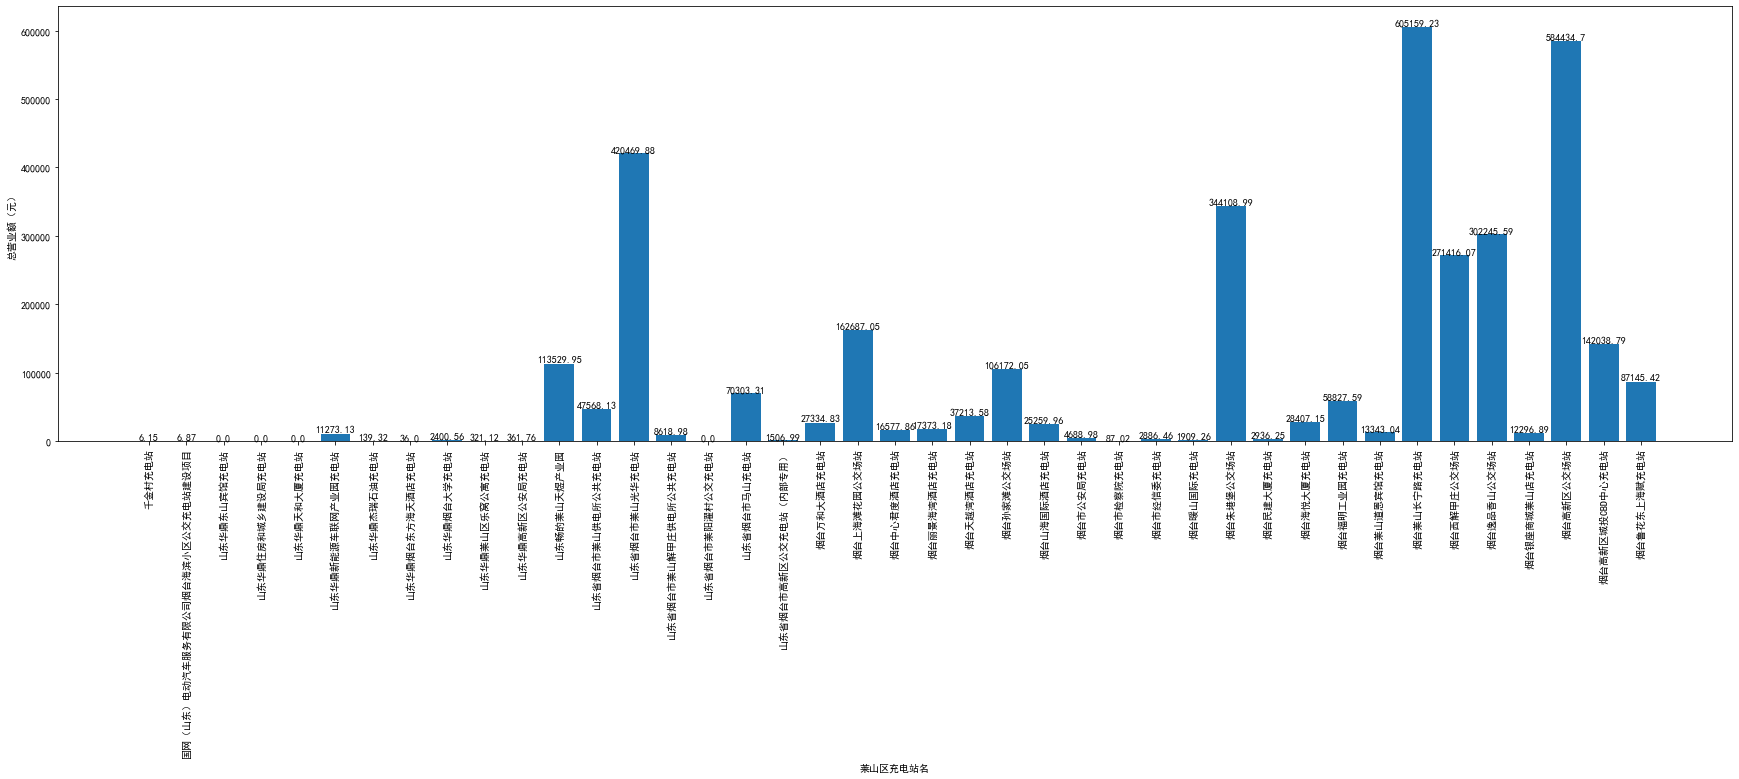

In [580]:
# economic analysis of each station
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
plt.figure(figsize=(30,8))
plt.bar(data_final_laishan_sum.index, data_final_laishan_sum['TotalMoney'], tick_label=data_final_laishan_sum.index)
plt.xlabel('莱山区充电站名')
plt.ylabel('总营业额（元）')
for a,b in zip(data_final_laishan_sum.index, data_final_laishan_sum['TotalMoney']):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
plt.xticks(rotation = 90)
import warnings
warnings.filterwarnings('ignore')

<center> 图5.2 莱山区各充电站营业总额

每个充电站充电桩个数不同，平均到每个充电桩的年营收总额更能体现各站点的经营情况。单个充电桩平均年营收排名前三的为山东畅的莱山天煜产业园，山东省烟台市莱山光华充电站，烟台逸品香山公交场站

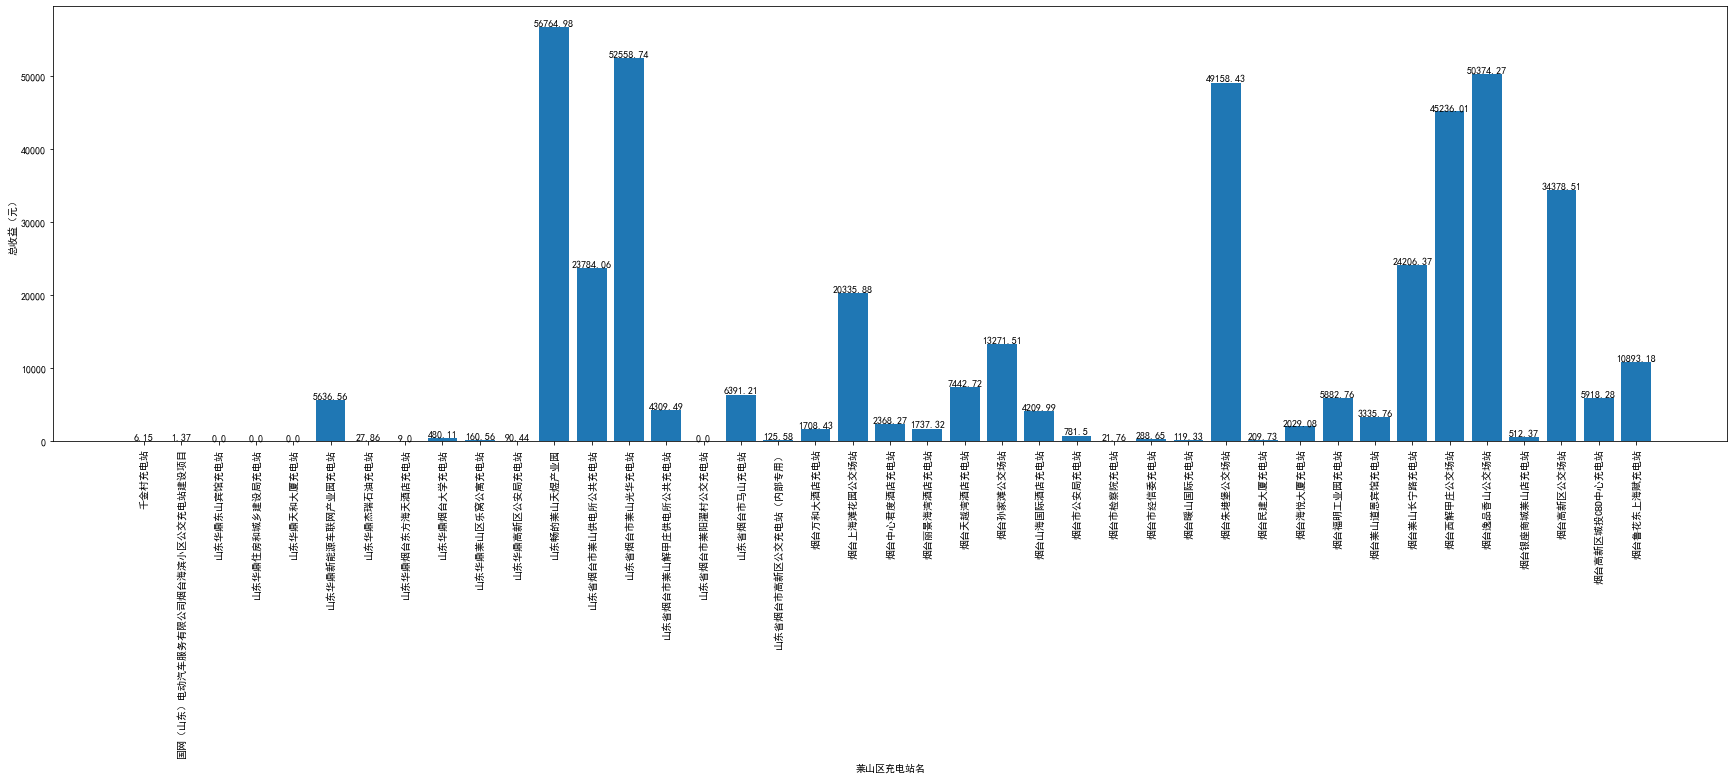

In [535]:
# economic analysis of each station
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
plt.figure(figsize=(30,8))
plt.bar(data_final_laishan_sum.index, data_final_laishan_sum['TotalMoney']/data_final_laishan_sum['Number_charging_piles'], tick_label=data_final_laishan_sum.index)
plt.xlabel('莱山区充电站名')
plt.ylabel('总收益（元）')
for a,b in zip(data_final_laishan_sum.index, round(data_final_laishan_sum['TotalMoney']/data_final_laishan_sum['Number_charging_piles'],2)):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
plt.xticks(rotation = 90)
import warnings
warnings.filterwarnings('ignore')

<center> 图5.3 莱山区各充电站各充电桩平均营业总额

以下代码对莱山区各充电站每个订单充电时长及营收额进行数据统计分析，包括最小值，最大值，中位数，平均值以及方差。方差的大小体现了数据的波动范围，方差越大，说明数据之间差异越大，充电行为模式较多；反之，说明充电行为模型单一且较为稳定。

In [564]:
# data statistics
data_final_laishan_sta = data_final_laishan.groupby('StationName')['Totaltime','TotalPower','TotalMoney'].aggregate(['min', np.median, np.mean, np.std, max])
data_final_laishan_sta

Totaltime                                 \
                                      min median        mean         std   
StationName                                                                
千金村充电站                                  0    1.0    2.533333    5.026596   
国网（山东）电动汽车服务有限公司烟台海滨小区公交充电站建设项目         0    1.0    2.000000    2.449490   
山东华鼎东山宾馆充电站                             0    1.0   15.357143   22.012609   
山东华鼎住房和城乡建设局充电站                         0   28.0   56.600000   68.824414   
山东华鼎天和大厦充电站                             3   71.0   51.666667   42.442117   
山东华鼎新能源车联网产业园充电站                        0   71.0   88.173691  114.507811   
山东华鼎杰瑞石油充电站                             0   87.0  125.454545  128.196143   
山东华鼎烟台东方海天酒店充电站                         0    1.0   48.041667   73.858680   
山东华鼎烟台大学充电站                             0   56.0  106.066667  157.448401   
山东华鼎莱山区乐窝公寓充电站                          1  104.5  105.681818   60.482494   
山东华鼎高新区公安局充电站                           0   19.0   65.141593   92.868846   
山东畅的莱山天煜产业园                             0   95.0  211.104871  243.775107   
山东省烟台市莱山供电所公共充电站                        0   74.0  164.649173  233.529303   
山东省烟台市莱山光华充电站                           0   45.0   61.577763   86.897835   
山东省烟台市莱山解甲庄供电所公共充电站                     0   48.0  162.496933  302.774845   
山东省烟台市莱阳濯村公交充电站                         1    1.0    1.500000    1.000000   
山东省烟台市马山充电站                             0   49.0   82.239455  133.890270   
山东省烟台市高新区公交充电站（内部专用）                    0  211.0  322.116835  318.588291   
烟台万和大酒店充电站                              0   69.0   85.508399   96.046894   
烟台上海滩花园公交场站                             0   20.0   33.660544   31.503363   
烟台中心君度酒店充电站                             0   67.0  118.579832  122.853468   
烟台丽景海湾酒店充电站                             0   68.0   73.811060   63.510965   
烟台天越湾酒店充电站                              0   52.0   52.135348   26.847270   
烟台孙家滩公交场站                               0  107.0  101.077030   58.267813   
烟台山海国际酒店充电站                             0   95.0  137.405431  129.401547   
烟台市公安局充电站                               0  159.5  168.227273  104.195397   
烟台市检察院充电站                              49   59.0   88.750000   66.334380   
烟台市经信委充电站                               0   98.5  124.962500  114.334945   
烟台暖山国际充电站                               0   80.0   92.120805   86.729925   
烟台朱塂堡公交场站                               0   32.0   42.249479   33.248399   
烟台民建大厦充电站                               2   78.0   90.580645   77.023052   
烟台海悦大厦充电站                               0   76.0   75.485528   45.181949   
烟台福明工业园充电站                              0   77.0   87.364768   68.204914   
烟台莱山道恩宾馆充电站                             0   36.0   44.912206   32.193534   
烟台莱山长宁路充电站                              0   52.0   53.112949   29.649947   
烟台西解甲庄公交场站                              0   44.0   46.505453   29.128560   
烟台逸品香山公交场站                              0   40.0   42.118824   20.232198   
烟台银座商城莱山店充电站                            0   53.0   56.905629   36.251783   
烟台高新区公交场站                               0   48.0   76.496949   64.970744   
烟台高新区城投CBD中心充电站                         0   67.0   68.018066   45.224760   
烟台鲁花东上海赋充电站                             0   68.0   88.446758   90.212311   

                                      TotalPower                       \
                                  max        min   median        mean   
StationName                                                             
千金村充电站                             19        0.0    0.000    0.273333   
国网（山东）电动汽车服务有限公司烟台海滨小区公交充电站建设项目    10        0.0    0.000    0.268000   
山东华鼎东山宾馆充电站                        71        0.0    0.300    2.571429   
山东华鼎住房和城乡建设局充电站                   158        0.0    3.000   11.080000   
山东华鼎天和大厦充电站                        81        0.4    7.800    6.000000   
山东华鼎新能源车联网产业园充电站                 1189        0.0   12.200   17.110345   
山东华鼎杰瑞石油充电站                   

以下函数实现数据统计图绘制，同时也可以对除莱山区的其它区市进行统计分析。

In [570]:
def plot_sta(data=data_final_laishan_sta, name_1='Totaltime', name_2='mean'):
    mpl.rcParams['font.sans-serif'] = ['SimHei'] 
    plt.figure(figsize=(30,8))
    plt.bar(data.index, data[name_1][name_2], tick_label=data.index)
    plt.xlabel('莱山区充电站名')
    plt.ylabel(name_1 + '('+ name_2 + ')')
    for a,b in zip(data.index, round(data[name_1][name_2],2)):
            plt.text(a,b,
                    b,
                     ha='center', 
                    va='bottom',
                    )
    plt.xticks(rotation = 90)
    import warnings
    warnings.filterwarnings('ignore')

以下代码实现展示充电站各订单每次充电的平均时长，时长越长，可能存在电已经充满，而充电桩仍然被占用的情况。从下图5.4可以看出山东省烟台市高新区公交充电站（内部专用）平均充电时间最长，超过6小时，可能跟内部专用特性有关。其它充电站充电时长通常在1.5个小时左右，可得出基本为快充模式。

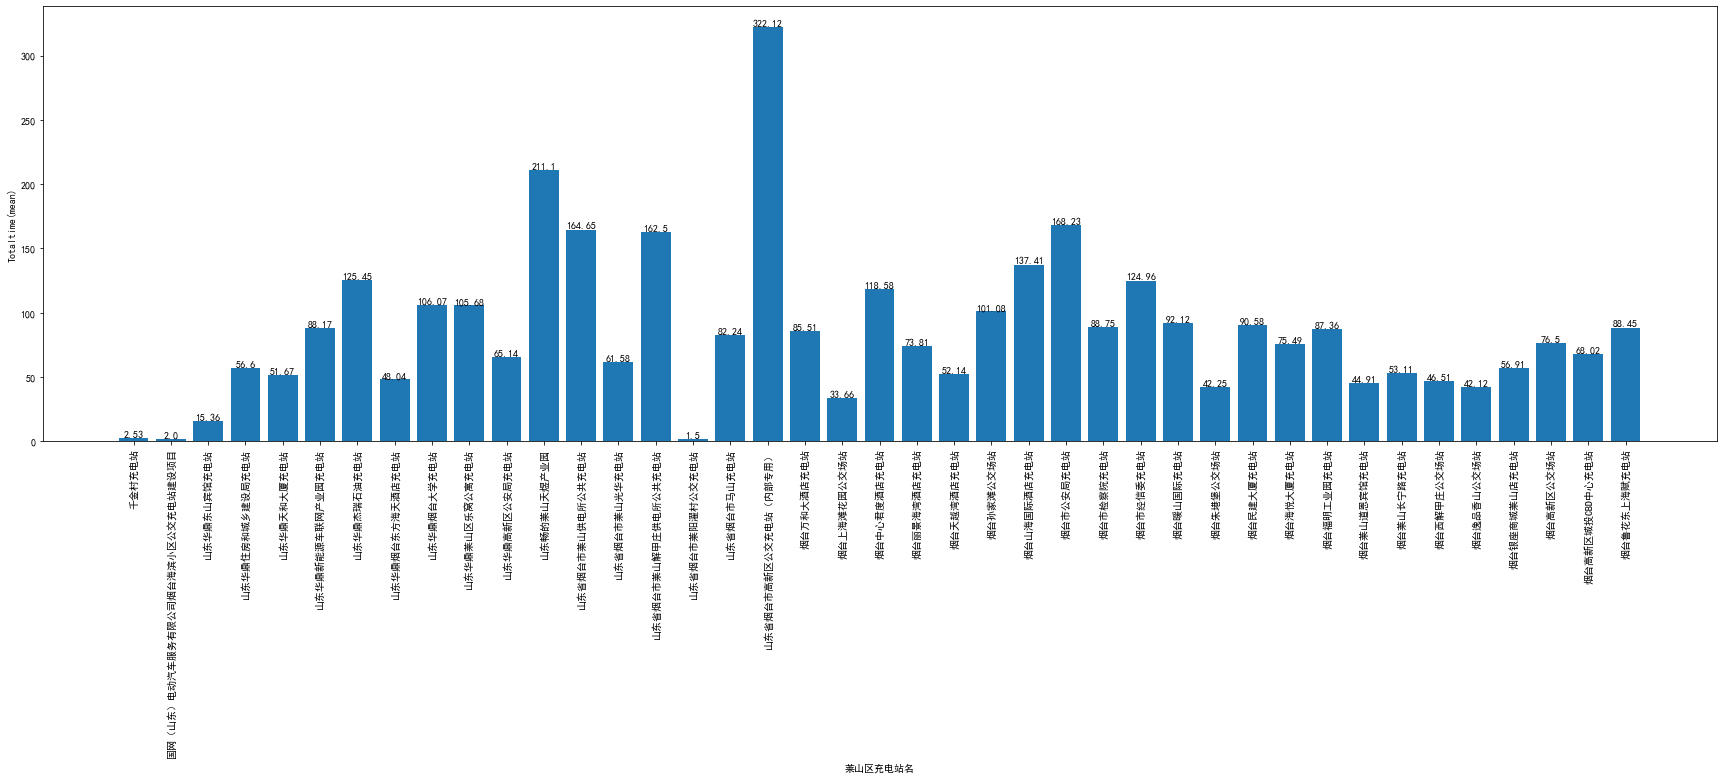

In [571]:
plot_sta(name_1='Totaltime', name_2='mean')

<center> 图5.4 莱山区各充电站平均单次充电时长（分钟）

以下代码实现展示各充电站各订单每次充电的平均营收额。从下图5.5可以看出山东畅的莱山天煜产业园平均营业额最多，超过65元。其它充电站平均单次充电营业额通常在20元左右。

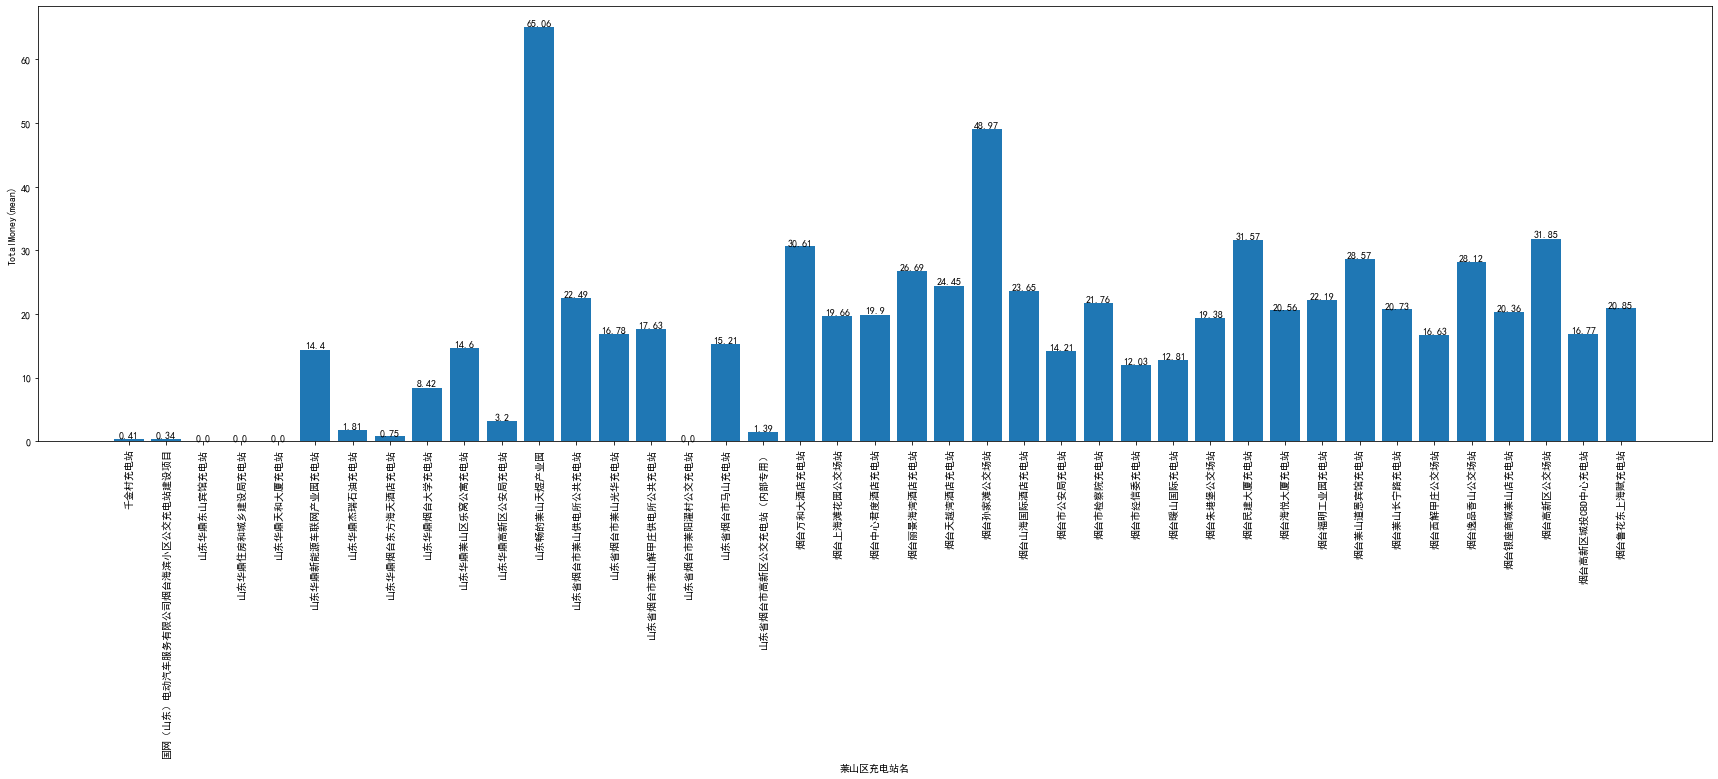

In [572]:
plot_sta(name_1='TotalMoney', name_2='mean')

<center> 图5.5 莱山区各充电站平均单次充电营业额（元）

下图5.6为各充电站单次充电的时间方差，排名前三的为山东省烟台市高新区公交充电站（内部专用），山东省烟台市莱山解甲庄供电所公共充电站，山东畅的莱山天煜产业园。说明各用户充电时长不确定性更大，有些用户充电时长很短就结束了订单，而有些充电时长又较长。

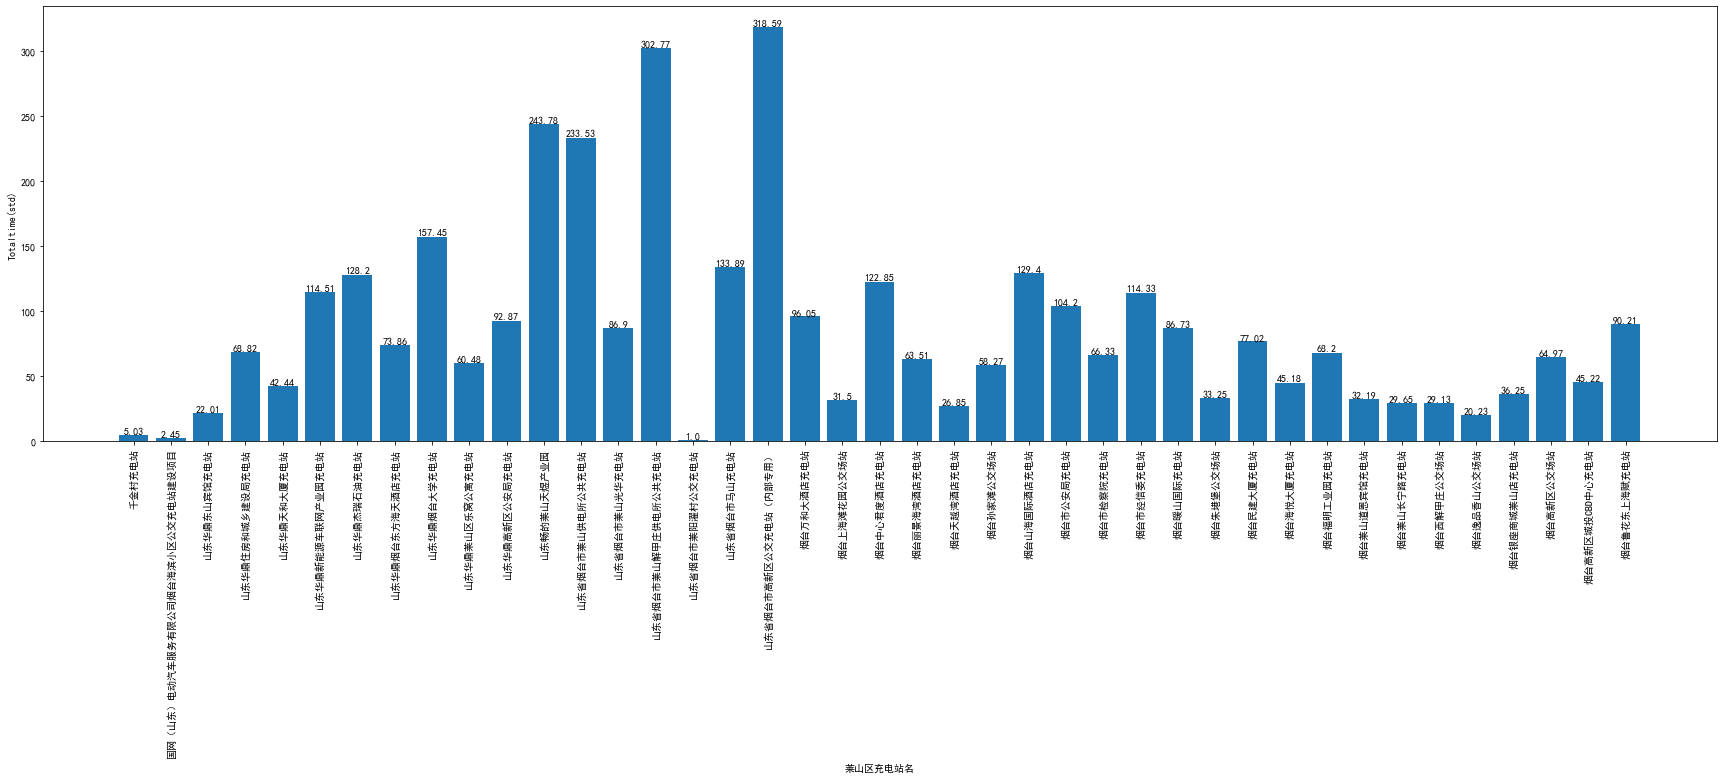

In [573]:
plot_sta(name_1='Totaltime', name_2='std')

<center> 图5.6 莱山区各充电站平均单次充电时长方差统计

# 主要结论

通过初赛阶段和决赛阶段的数据挖掘及分析，主要结论如下：  
(1). 莱山区、芝罘区、福山区充电桩布局最多，栖霞山、龙口市、莱州市充电桩布局最少。充电桩月平均使用次数前三分别为福山区、莱州市、莱山区。莱州市充电桩布局少，但需求量较大，莱州市可适当新增充电桩数量。   
(2). 莱山区到2025年需要增加的充电桩数量约为274个，到2030年需要增加的充电桩数量约为651个。  
(3). 2021年，烟台莱山长宁路充电站、烟台高新区公交场站、山东省烟台市莱山光华充电站为营收总额前三的充电站。山东畅的莱山天煜产业园、山东省烟台市莱山光华充电站、烟台逸品香山公交场站为单个充电桩营收额前三的充电站。   
(4). 山东省烟台市高新区公交充电站（内部专用）单次平均充电时间最长，超过6小时，其它充电站充电时长通常在 1.5 个小时左右。   
(5). 山东畅的莱山天煜产业园单次订单充电平均金额最高，为 65 元，其它充电站平均单次充电金额通常在 20 元左右。  